<a href="https://colab.research.google.com/github/kazuniga7/March-Madness-Project/blob/main/March_Madness_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This program was a partner project where my partner and I tested different models to see which
# would best be suited to predict the 2025 March Madness bracket based on the match-up difference of regular season team
# stats of that year.
# The code marked "Kevin code" was work done by me, and the work marked "Mack code" was done by my partner.


# Model Training:
# The models were always trained on the results of the previous years' March Madness and the previous year's only because
# our personal opinion was that using data from later years isn't as reasonable since teams, coaching, and other factors change.
# We evaluated each model based on how well it predicted the 2024 March Madness matchups when trained on the 2023 March Madness data.
# We trained a total of 4 different models where we first tried tuning the input features then hyperparameters, and then doing the
# it the other way around. In addition,we ensembled each pairing. I worked with KNeighbors and GaussianNB models and my partner
# worked with LogisticRegression and RandomForestClassifier models.
# The base input features we decided to start with were a personal decision made by my partner who had more
# knowledge of basketball than me.


# Data Collection:
# We scraped data off two websites, the NCAA website and the College Basketball Sports Reference website. From the NCAA website,
# we got the 2023 and 2024 March Madness matchups and seedings. From the Sports Reference website, we got the regular season
# stats for the teams in each year.
# I web-scraped the NCAA website while my partner scrapped the Sports Reference website. My partner then combined all the scraped data
# into one data frame containing the matchups for March Madness and the difference in team stats based on the matchups.


# Results:
# After comparing the statistics of each model, specifically the f1 scores, the model that performed the best was the Random Forest
# ensemble model we tested. The runner up to this model was one of the GaussianNB models we also tested. Although statistically these
# models tested well, my partner and I still came to the conclusion that the March Madness tournament is something that is very difficult
# to predict. My partner who knows more about basketball then me was a little unsure of some of the predictions that both models outputed.
# Below are the predicted brackets of each model.

# Of the code below, the starting code is the web scraping used to obtain all the data. The code that follows is easy access to the
# predictions outputted by the GaussianNB and RandomForest ensemble model spoken of above for comparison.
# The rest of the code that follows after is all the testing that was done with different models.

In [ ]:
# Web-scraping code (All code below this until next comment-change)

In [ ]:
# Kevin code
import pandas as pd

import requests
from bs4 import BeautifulSoup

# 2023 March Madness Match ups from the NCAA website
url22_23 = "https://www.ncaa.com/news/basketball-men/article/2023-04-18/2023-ncaa-bracket-scores-stats-march-madness-mens-tournament"

response = requests.get(url22_23)

soup = BeautifulSoup(response.text, parser="html.parser")

In [ ]:
# Kevin code

# Searched for specific tag in the html of the wesbite
tournament_scores22_23 = soup.find_all("ul")[18].children

# Creating a data frame of the match ups that includes the two different teams and seeds, and the winner
marchMad22_23 = {"teamA":[], "teamB": [], "teamA Seed":[], "teamB Seed": [], "winner": []}

for pairing in tournament_scores22_23:
  if pairing == "\n":
    continue

  pairings = pairing.find("ul").children

  for pair in pairings:
    if pair == "\n":
      continue
    teams_info = pair.text.replace("\n","").split("| Watch the highlights")[:-1]

    for team in teams_info:

      teams = team.split("No.")[1:]

      infoA = teams[0].replace(",","").replace("(","").replace(")","").split()
      infoB = teams[1].replace(",","").replace("(","").replace(")","").split()

      nameA = " ".join(infoA[1 : -1])
      nameB = " ".join(infoB[1 : -1])

      seedA = int(infoA[0])
      seedB = int(infoB[0])

      scoreA = int(infoA[-1])
      scoreB = int(infoB[-1])

      marchMad22_23["teamA"].append(nameA)
      marchMad22_23["teamB"].append(nameB)
      marchMad22_23["teamA Seed"].append(seedA)
      marchMad22_23["teamB Seed"].append(seedB)
      if scoreA > scoreB:
        marchMad22_23["winner"].append(nameA)
      elif scoreB > scoreA:
        marchMad22_23["winner"].append(nameB)


In [ ]:
# Kevin code
dfmarchMad22_23 = pd.DataFrame(marchMad22_23)
dfmarchMad22_23

,teamA,teamB,teamA Seed,teamB Seed,winner
0,FDU,Texas Southern,16,16,FDU
1,Arizona St.,Nevada,11,11,Arizona St.
2,Texas A&M - CC,SE Missouri St.,16,16,Texas A&M - CC
3,Pittsburgh,Mississippi St.,11,11,Pittsburgh
4,Houston,North Kentucky,1,16,Houston
...,...,...,...,...,...
62,FAU,Kansas St.,9,3,FAU
63,San Diego St.,Creighton,5,6,San Diego St.
64,San Diego St.,FAU,5,9,San Diego St.
65,UConn,Miami FL,4,5,UConn


In [ ]:
# Kevin code

# 2023 March Madness Match ups from the NCAA website
url23_24 = "https://www.ncaa.com/news/basketball-men/article/2024-12-06/2024-ncaa-bracket-scores-stats-march-madness-mens-tournament"

response = requests.get(url23_24)

soup = BeautifulSoup(response.text, parser="html.parser")

In [ ]:
# Kevin Code
tournament_scores23_24 = soup.find_all("ul")[18].children

marchMad23_24 = {"teamA":[], "teamB": [], "teamA Seed":[], "teamB Seed": [], "winner": []}

for pairing in tournament_scores23_24:
  if pairing == "\n":
    continue

  pairings = pairing.find("ul").children

  for pair in pairings:
    if pair == "\n":
      continue
    teams_info = pair.text.replace("\n","").split("| Watch the highlights")[:-1]

    for team in teams_info:

      teams = team.split("No.")[1:]

      infoA = teams[0].replace(",","").replace("(","").replace(")","").replace("OT","").replace("2OT","").split()
      infoB = teams[1].replace(",","").replace("(","").replace(")","").replace("OT","").replace("2OT","").split()

      nameA = " ".join(infoA[1 : -1])
      nameB = " ".join(infoB[1 : -1])

      seedA = int(infoA[0])
      seedB = int(infoB[0])

      scoreA = int(infoA[-1])
      scoreB = int(infoB[-1])

      marchMad23_24["teamA"].append(nameA)
      marchMad23_24["teamB"].append(nameB)
      marchMad23_24["teamA Seed"].append(seedA)
      marchMad23_24["teamB Seed"].append(seedB)
      if scoreA > scoreB:
        marchMad23_24["winner"].append(nameA)
      elif scoreB > scoreA:
        marchMad23_24["winner"].append(nameB)


In [ ]:
# Kevin code
dfmarchMad23_24 = pd.DataFrame(marchMad23_24)
dfmarchMad23_24

,teamA,teamB,teamA Seed,teamB Seed,winner
0,Wagner,Howard,16,16,Wagner
1,Colorado State,Virginia,10,10,Colorado State
2,Grambling State,Montana State,16,16,Grambling State
3,Colorado,Boise State,10,10,Colorado
4,UConn,Stetson,1,16,UConn
...,...,...,...,...,...
62,NC State,Duke,11,4,NC State
63,Purdue,Tennessee,1,2,Purdue
64,UConn,Alabama,1,4,UConn
65,Purdue,NC State,1,11,Purdue


In [ ]:
# Mack code

# web scraping the 22-23 team data for teams in March Madness that year
import time

url = "https://www.sports-reference.com/cbb/seasons/men/2023-school-stats.html"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Find the specific table
table = soup.find("table", {"id": "basic_school_stats"})

thead_rows = table.find("thead").find_all("tr")
last_header_row = thead_rows[-1]
header_cells = last_header_row.find_all("th")
headers = [th.get_text(strip=True) for th in header_cells]

tbody_rows = table.find("tbody").find_all("tr")
data = []
for row in tbody_rows:
    cells = row.find_all(["th", "td"])
    row_data = []
    for cell in cells:
      text = cell.get_text(strip=True)
      row_data.append(text)
    data.append(row_data)
    time.sleep(0.1) # sleep timer to be respectful

df_2022 = pd.DataFrame(data, columns=headers)
df_march_2022 = df_2022[df_2022["School"].str.contains("NCAA")].copy()
df_march_2022["School"] = df_march_2022["School"].str.replace("NCAA", "")
df_march_2022.reset_index(drop=True, inplace=True)

In [ ]:
# Mack code

# (Before I finished my webscrapping, my partner decided to manually get the seedings of each team himself)
# manually adds seeding for each team based on bracket seeding
team_seed_map = {
    "Alabama": 1,
    "Texas A&M-Corpus Christi": 16,
    "Maryland": 8,
    "West Virginia": 9,
    "San Diego State": 5,
    "College of Charleston": 12,
    "Virginia": 4,
    "Furman": 13,
    "Creighton": 6,
    "NC State": 11,
    "Baylor": 3,
    "UC Santa Barbara": 14,
    "Missouri": 7,
    "Utah State": 10,
    "Arizona": 2,
    "Princeton": 15,
    "Purdue": 1,
    "FDU": 16,
    "Memphis": 8,
    "Florida Atlantic": 9,
    "Duke": 5,
    "Oral Roberts": 12,
    "Tennessee": 4,
    "Louisiana": 13,
    "Kentucky": 6,
    "Providence": 11,
    "Kansas State": 3,
    "Montana State": 14,
    "Michigan State": 7,
    "Southern California": 10,
    "Marquette": 2,
    "Vermont": 15,
    "Southeast Missouri State": 16,
    "Texas Southern": 16,
    "Nevada": 11,
    "Mississippi State": 11,
    "Houston": 1,
    "Northern Kentucky": 16,
    "Iowa": 8,
    "Auburn": 9,
    "Miami (FL)": 5,
    "Drake": 12,
    "Indiana": 4,
    "Kent State": 13,
    "Iowa State": 6,
    "Pittsburgh": 11,
    "Xavier": 3,
    "Kennesaw State": 14,
    "Texas A&M": 7,
    "Penn State": 10,
    "Texas": 2,
    "Colgate": 15,
    "Kansas": 1,
    "Howard": 16,
    "Arkansas": 8,
    "Illinois": 9,
    "Saint Mary's (CA)": 5,
    "Virginia Commonwealth": 12,
    "Connecticut": 4,
    "Iona": 13,
    "TCU": 6,
    "Arizona State": 11,
    "Gonzaga": 3,
    "Grand Canyon": 14,
    "Northwestern": 7,
    "Boise State": 10,
    "UCLA": 2,
    "UNC Asheville": 15
}

# need this so i can rerun the code without it failing
if "Seed" in df_march_2022.columns:
    df_march_2022.drop(columns="Seed", inplace=True)

df_march_2022.insert(
    loc=df_march_2022.columns.get_loc("Rk") + 1,
    column="Seed",
    value=df_march_2022["School"].map(team_seed_map)
)

df_march_2022["Seed"] = df_march_2022["Seed"]

In [ ]:
# Mack code

# cleaning the 2022 data to match the other dataset with matchups
for index in df_march_2022.index:
    if "State" in df_march_2022.loc[index, "School"]:
        df_march_2022.loc[index, "School"] = df_march_2022.loc[index, "School"].replace("State", "St.")

df_march_2022.loc[8, "School"] = df_march_2022.loc[8, "School"].replace("College", "Col")
df_march_2022.loc[14, "School"] = df_march_2022.loc[14, "School"].replace("Florida Atlantic", "FAU")
df_march_2022.loc[34, "School"] = "Miami FL"
df_march_2022.loc[39, "School"] = df_march_2022.loc[39, "School"].replace("St.", "State")
df_march_2022.loc[41, "School"] = df_march_2022.loc[41, "School"].replace("Northern", "North")
df_march_2022.loc[49, "School"] = "Saint Mary's"
df_march_2022.loc[51, "School"] = "SE Missouri St."
df_march_2022.loc[52, "School"] = "USC"
df_march_2022.loc[57, "School"] = "Texas A&M-CC"
df_march_2022.loc[59, "School"] = "UCSB"
df_march_2022.loc[65, "School"] = "VCU"
df_march_2022.loc[6, "School"] = "Boise St."
df_march_2022.loc[9, "School"] = "UConn"


# data preprocessing and formatting in preparation for combined dataset
dfmarchMad22_23 = dfmarchMad22_23.replace("Texas A&M - CC", "Texas A&M-CC")
dfmarchMad22_23 = dfmarchMad22_23.replace("Pitt", "Pittsburgh")

# weird apostrophe case
dfmarchMad22_23 = dfmarchMad22_23.replace("Saint Mary’s", "Saint Mary's")

dfmarchMad22_23 = dfmarchMad22_23.replace("St. Mary’s", "Saint Mary's")

# some columns leftover that are empty, dropping them
df_march_2022_final = df_march_2022.drop(columns=[""])

In [ ]:
# Mack code

# code to combine 22-23 stats

import pandas as pd
import random
# use same randomized code every run
random.seed(42)

# Columns of interest (all numeric)
stats_columns = [
    'Seed', 'W-L%', 'SRS', 'SOS', 'Tm.', 'Opp.', 'MP', 'FG', 'FGA', 'FG%',
    '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'TRB', 'AST',
    'STL', 'BLK', 'TOV', 'PF'
]

# Convert these columns to numeric
df_march_2022_final[stats_columns] = df_march_2022_final[stats_columns].apply(
    pd.to_numeric, errors='coerce'
)

matchup_rows = []

# Loop through all matchups in your bracket DataFrame
for idx, row in dfmarchMad22_23.iterrows():
    team1 = row["teamA"]
    team2 = row["teamB"]
    winner = row["winner"]

    seed1 = row["teamA Seed"]
    seed2 = row["teamB Seed"]

    # Gather stats for both teams (assuming exact matching names)
    team1_stats = df_march_2022_final.loc[df_march_2022_final["School"] == team1].iloc[0]
    team2_stats = df_march_2022_final.loc[df_march_2022_final["School"] == team2].iloc[0]

    # Randomly decide which team goes first, since winning team is always first from the website
    if random.random() < 0.5:
        # keep the original order
        actualTeamA, actualTeamB = team1, team2
        actualSeedA, actualSeedB = seed1, seed2
        teamA_stats, teamB_stats = team1_stats, team2_stats
    else:
        # swap them
        actualTeamA, actualTeamB = team2, team1
        actualSeedA, actualSeedB = seed2, seed1
        teamA_stats, teamB_stats = team2_stats, team1_stats

    # Build a dictionary for each matchup
    matchup_dict = {
        "teamA": actualTeamA,
        "teamB": actualTeamB,
        "seedA": actualSeedA,
        "seedB": actualSeedB,
    }

    # Compute differences for each numeric column
    for col in stats_columns:
        matchup_dict[f"{col}_diff"] = teamA_stats[col] - teamB_stats[col]

    # Compute seed difference
    matchup_dict["seed_diff"] = actualSeedA - actualSeedB

    # Label: 1 if actualTeamA is the winner, 0 otherwise
    matchup_dict["winner"] = 1 if winner == actualTeamA else 0

    # Append to our matchup_rows list
    matchup_rows.append(matchup_dict)

# Convert the list of matchup dicts into a DataFrame
df_combined_22_23 = pd.DataFrame(matchup_rows)

# Optional: save to CSV
df_combined_22_23.to_csv("marchMad22_23_combined.csv", index=False)
df_combined_22_23

,teamA,teamB,seedA,seedB,Seed_diff,W-L%_diff,SRS_diff,SOS_diff,Tm._diff,Opp._diff,...,FT%_diff,ORB_diff,TRB_diff,AST_diff,STL_diff,BLK_diff,TOV_diff,PF_diff,seed_diff,winner
0,Texas Southern,FDU,16,16,0,-0.168,-1.58,4.78,-441,-226,...,-0.088,-22,42,-133,-60,42,86,-39,0,0
1,Arizona St.,Nevada,11,11,0,-0.028,1.28,1.77,162,209,...,-0.103,150,214,41,58,70,83,76,0,1
2,Texas A&M-CC,SE Missouri St.,16,16,0,0.158,4.83,-0.21,14,-173,...,0.083,78,44,39,45,-55,-23,-102,0,1
3,Pittsburgh,Mississippi St.,11,11,0,0.049,-0.84,-1.49,470,437,...,0.112,-76,13,24,-108,30,-34,68,0,1
4,North Kentucky,Houston,16,1,15,-0.263,-23.03,-7.68,-398,98,...,-0.037,-80,-305,-76,36,-93,25,-83,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,Kansas St.,FAU,3,9,-6,-0.175,1.87,7.18,-293,-32,...,0.029,-70,-272,49,37,0,38,31,-6,0
63,Creighton,San Diego St.,6,5,1,-0.172,2.02,0.88,53,56,...,0.061,-120,-47,77,-77,1,-23,-148,1,0
64,FAU,San Diego St.,9,5,4,0.076,-1.89,-6.62,260,72,...,-0.003,-1,103,58,-10,-51,8,-21,4,0
65,Miami FL,UConn,5,4,1,-0.011,-8.97,-1.67,-139,160,...,0.023,-123,-249,-149,25,-75,-92,-165,1,0


In [ ]:
# Mack code

# code to webscrape 23-24 stats for each team in march madness that year
import time

url = "https://www.sports-reference.com/cbb/seasons/men/2024-school-stats.html"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Find the specific table
table = soup.find("table", {"id": "basic_school_stats"})

thead_rows = table.find("thead").find_all("tr")
last_header_row = thead_rows[-1]
header_cells = last_header_row.find_all("th")
headers = [th.get_text(strip=True) for th in header_cells]

tbody_rows = table.find("tbody").find_all("tr")
data = []
for row in tbody_rows:
    cells = row.find_all(["th", "td"])
    row_data = []
    for cell in cells:
      text = cell.get_text(strip=True)
      row_data.append(text)
    data.append(row_data)
    time.sleep(0.1) # sleep timer to be respectful

df_2023 = pd.DataFrame(data, columns=headers)

df_march_2023 = df_2023[df_2023["School"].str.contains("NCAA")].copy()
df_march_2023["School"] = df_march_2023["School"].str.replace("NCAA", "")
df_march_2023.reset_index(drop=True, inplace=True)

In [ ]:
# cleaning the 2023 data to match the other dataset with matchups
for index in df_march_2023.index:
    if "St." in df_march_2023.loc[index, "School"]:
        df_march_2023.loc[index, "School"] = df_march_2023.loc[index, "School"].replace("St.", "State")

df_march_2023.loc[6, "School"] = "BYU"
df_march_2023.loc[9, "School"] = "Charleston"
df_march_2023.loc[19, "School"] = "Florida Atlantic"
df_march_2023.loc[33, "School"] = "McNeese"
df_march_2023.loc[38, "School"] = "NC State"
df_march_2023.loc[47, "School"] = "Saint Mary's"
df_march_2023.loc[12, "School"] = "UConn"
df_march_2023.loc[21, "School"] = "Grambling State"

dfmarchMad23_24 = dfmarchMad23_24.replace("Oregon 73", "Oregon")

In [ ]:
# Mack code

# manually adds seeding for each team based on bracket seeding
team_seed_map = {
    "Akron": 14,
    "Alabama": 4,
    "Arizona": 2,
    "Auburn": 4,
    "Baylor": 3,
    "Boise State": 10,
    "BYU": 6,
    "Clemson": 6,
    "Colgate": 14,
    "Charleston": 13,
    "Colorado": 10,
    "Colorado State": 10,
    "UConn": 1,
    "Creighton": 3,
    "Dayton": 7,
    "Drake": 10,
    "Duke": 4,
    "Duquesne": 11,
    "Florida": 7,
    "Florida Atlantic": 8,
    "Gonzaga": 5,
    "Grambling State": 16,
    "Grand Canyon": 12,
    "Houston": 1,
    "Howard": 16,
    "Illinois": 3,
    "Iowa State": 2,
    "James Madison": 12,
    "Kansas": 4,
    "Kentucky": 3,
    "Long Beach State": 15,
    "Longwood": 16,
    "Marquette": 2,
    "McNeese": 12,
    "Michigan State": 9,
    "Mississippi State": 8,
    "Montana State": 16,
    "Morehead State": 14,
    "NC State": 11,
    "Nebraska": 8,
    "Nevada": 10,
    "New Mexico": 11,
    "North Carolina": 1,
    "Northwestern": 9,
    "Oakland": 14,
    "Oregon": 11,
    "Purdue": 1,
    "Saint Mary's": 5,
    "Saint Peter's": 15,
    "Samford": 13,
    "San Diego State": 5,
    "South Carolina": 6,
    "South Dakota State": 15,
    "Stetson": 16,
    "TCU": 9,
    "Tennessee": 2,
    "Texas": 7,
    "Texas A&M": 9,
    "Texas Tech": 1,
    "UAB": 1,
    "Utah State": 6,
    "Vermont": 13,
    "Virginia": 10,
    "Wagner": 16,
    "Washington State": 7,
    "Western Kentucky": 15,
    "Wisconsin": 5,
    "Yale": 13
}

# need this so i can rerun the code without it failing
if "Seed" in df_march_2023.columns:
    df_march_2023.drop(columns="Seed", inplace=True)

df_march_2023.insert(
    loc=df_march_2023.columns.get_loc("Rk") + 1,
    column="Seed",
    value=df_march_2023["School"].map(team_seed_map)
)

df_march_2023["Seed"] = df_march_2023["Seed"]

In [ ]:
# Mack code

# code to combine 23-24 stats

random.seed(42)

# Columns of interest (all numeric)
stats_columns = ['Seed', 'W-L%', 'SRS', 'SOS', 'Tm.', 'Opp.', 'MP', 'FG', 'FGA', 'FG%',
    '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'TRB', 'AST',
    'STL', 'BLK', 'TOV', 'PF']

# Convert these columns to numeric
df_march_2023[stats_columns] = df_march_2023[stats_columns].apply(
    pd.to_numeric, errors='coerce'
)

matchup_rows = []

# Loop through all matchups in your bracket DataFrame
for idx, row in dfmarchMad23_24.iterrows():
    team1 = row["teamA"]
    team2 = row["teamB"]
    winner = row["winner"]

    seed1 = row["teamA Seed"]
    seed2 = row["teamB Seed"]

    # Gather stats for both teams (assuming exact matching names)
    team1_stats = df_march_2023.loc[df_march_2023["School"] == team1]
    team1_stats = team1_stats.iloc[0]

    team2_stats = df_march_2023.loc[df_march_2023["School"] == team2]
    team2_stats = team2_stats.iloc[0]

    # Randomly decide which team goes first
    if random.random() < 0.5:
        # keep the original order
        actualTeamA, actualTeamB = team1, team2
        actualSeedA, actualSeedB = seed1, seed2
        teamA_stats, teamB_stats = team1_stats, team2_stats
    else:
        # swap them
        actualTeamA, actualTeamB = team2, team1
        actualSeedA, actualSeedB = seed2, seed1
        teamA_stats, teamB_stats = team2_stats, team1_stats

    matchup_dict = {
        "teamA": actualTeamA,
        "teamB": actualTeamB,
        "seedA": actualSeedA,
        "seedB": actualSeedB,
    }

    for col in stats_columns:
        matchup_dict[f"{col}_diff"] = teamA_stats[col] - teamB_stats[col]

    matchup_dict["seed_diff"] = actualSeedA - actualSeedB

    # make winner label = None so model can predict
    matchup_dict["winner"] = 1 if winner == actualTeamA else 0

    matchup_rows.append(matchup_dict)

df_combined_23_24 = pd.DataFrame(matchup_rows)

df_combined_23_24.to_csv("marchMad23_24_combined.csv", index=False)
df_combined_23_24

,teamA,teamB,seedA,seedB,Seed_diff,W-L%_diff,SRS_diff,SOS_diff,Tm._diff,Opp._diff,...,FT%_diff,ORB_diff,TRB_diff,AST_diff,STL_diff,BLK_diff,TOV_diff,PF_diff,seed_diff,winner
0,Howard,Wagner,16,16,0,-0.001,1.95,0.56,520,517,...,0.047,26,74,64,17,22,215,154,0,0
1,Colorado State,Virginia,10,10,0,0.018,2.95,-0.03,567,389,...,0.115,-15,96,139,-13,-56,102,153,0,1
2,Grambling State,Montana State,16,16,0,0.097,-4.29,-1.02,-199,-100,...,-0.020,109,90,-109,-23,31,65,-70,0,1
3,Colorado,Boise State,10,10,0,0.036,2.64,1.01,456,433,...,0.048,-16,136,196,32,2,101,-2,0,1
4,Stetson,UConn,16,1,15,-0.296,-31.79,-11.94,-569,30,...,0.023,-130,-337,-283,-59,-109,-14,-134,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,Duke,NC State,4,11,-7,0.116,7.86,-0.57,-271,-555,...,-0.010,-32,-128,15,-62,-16,-43,-93,-7,0
63,Tennessee,Purdue,2,1,1,-0.122,-3.12,-1.18,-375,-265,...,0.031,-57,-184,-120,68,24,-75,93,1,0
64,Alabama,UConn,4,1,3,-0.249,-6.01,3.10,79,470,...,0.029,3,-86,-161,10,-55,55,84,3,0
65,NC State,Purdue,11,1,10,-0.238,-12.12,-2.67,-110,251,...,0.013,-61,-130,-184,85,6,-50,128,10,0


In [ ]:
# Easier access to the top 2 models mentioned at the beginning (Along with web-scraping code for this year's March Madness data)
# (All code below this until next comment-change)

In [ ]:
# Kevin code
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import (QuantileTransformer, MaxAbsScaler, Normalizer)
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

modelPredictions2025_YTrain = df_combined_23_24["winner"]

In [ ]:
# Kevin code
# Best Model 1: GaussianNB (Tuning Hyperparameters, then input features)

bestModel1_pipeline = make_pipeline(QuantileTransformer(n_quantiles=60, output_distribution='normal'),
                                        GaussianNB(var_smoothing=1e-12))
bestModel1_inputFeatures = ['SOS_diff', 'Tm._diff', 'Opp._diff', '3P%_diff', 'TRB_diff', 'STL_diff', 'BLK_diff']
bestModel1_XTrain = df_combined_23_24[bestModel1_inputFeatures]

bestModel1_pipeline.fit(bestModel1_XTrain, modelPredictions2025_YTrain)

Pipeline(steps=[('quantiletransformer',
                 QuantileTransformer(n_quantiles=60,
                                     output_distribution='normal')),
                ('gaussiannb', GaussianNB(var_smoothing=1e-12))])

In [ ]:
# Kevin code
# Best Model 2: RandomForest Ensemble

best_features_forests1 = ['SRS_diff', 'SOS_diff', 'Tm._diff', 'Opp._diff']
best_pipeline_forests1 = make_pipeline(MaxAbsScaler(), RandomForestClassifier(max_depth=5, min_samples_split=2, n_estimators=100))

best_features_forests2 = ['Seed_diff', 'SOS_diff', 'Opp._diff', 'TRB_diff', 'STL_diff', 'BLK_diff', 'PF_diff']
best_pipeline_forests2 = make_pipeline(Normalizer(), RandomForestClassifier(max_depth=5, min_samples_split=5,
                                                                            n_estimators=100, random_state=42))

forestsEnsemble_model = VotingClassifier(
    estimators=[('best_pipeline_forests1', best_pipeline_forests1), ('best_pipeline_forests2', best_pipeline_forests2)],
    voting='soft'
)

bestModel2_pipeline = forestsEnsemble_model

bestModel2_inputFeatures = list(set(best_features_forests1 + best_features_forests2))
bestModel2_XTrain = df_combined_23_24[bestModel2_inputFeatures]

bestModel2_pipeline.fit(bestModel2_XTrain, modelPredictions2025_YTrain)

VotingClassifier(estimators=[('best_pipeline_forests1',
                              Pipeline(steps=[('maxabsscaler', MaxAbsScaler()),
                                              ('randomforestclassifier',
                                               RandomForestClassifier(max_depth=5))])),
                             ('best_pipeline_forests2',
                              Pipeline(steps=[('normalizer', Normalizer()),
                                              ('randomforestclassifier',
                                               RandomForestClassifier(max_depth=5,
                                                                      min_samples_split=5,
                                                                      random_state=42))]))],
                 voting='soft')

In [ ]:
# Mack Code (Modified by Kevin)

# code to scrape this year's team data

import time

url = "https://www.sports-reference.com/cbb/seasons/men/2025-school-stats.html"
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

# Find the specific table
table = soup.find("table", {"id": "basic_school_stats"})

thead_rows = table.find("thead").find_all("tr")
last_header_row = thead_rows[-1]
header_cells = last_header_row.find_all("th")
headers = [th.get_text(strip=True) for th in header_cells]

tbody_rows = table.find("tbody").find_all("tr")
data = []
for row in tbody_rows:
    cells = row.find_all(["th", "td"])
    row_data = []
    for cell in cells:
      text = cell.get_text(strip=True)
      row_data.append(text)
    data.append(row_data)
    time.sleep(0.1) # sleep timer to be respectful

df_2025 = pd.DataFrame(data, columns=headers)

In [ ]:
# Mack code (Modified by Kevin)
df_2025.loc[5, "School"] = "Alabama St.NCAA"
df_2025.loc[31, "School"] = "BYUNCAA"
df_2025.loc[61, "School"] = "Colorado St.NCAA"
df_2025.loc[138, "School"] = "Iowa St.NCAA"
df_2025.loc[184, "School"] = "McNeeseNCAA"
df_2025.loc[192, "School"] = "Michigan St.NCAA"
df_2025.loc[199, "School"] = "Mississippi St.NCAA"
df_2025.loc[198, "School"] = "Ole MissNCAA"
df_2025.loc[280, "School"] = "Saint Francis UNCAA"
df_2025.loc[317, "School"] = "Saint John'sNCAA"
df_2025.loc[283, "School"] = "Saint Mary'sNCAA"
df_2025.loc[290, "School"] = "San Diego St.NCAA"
df_2025.loc[63, "School"] = "UConnNCAA"
df_2025.loc[362, "School"] = "Utah St.NCAA"
df_2025.loc[374, "School"] = "VCUNCAA"
df_2025.loc[224, "School"] = "Norfolk St.NCAA"

df_2025["School"] = df_2025["School"].str.replace("NCAA", "")
df_2025.reset_index(drop=True, inplace=True)
df_2025

,Rk,School,G,W,L,W-L%,SRS,SOS,,W,...,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF
0,1,Abilene Christian,32,16,16,.500,-5.71,-2.26,,8,...,476,666,.715,355,1081,421,331,94,476,670
1,2,Air Force,32,4,28,.125,-8.00,3.72,,1,...,363,572,.635,236,956,428,181,91,433,571
2,3,Akron,35,28,7,.800,3.34,-3.64,,17,...,445,590,.754,414,1347,621,267,131,414,623
3,4,Alabama,34,26,8,.765,25.24,15.57,,13,...,627,877,.715,431,1459,580,207,152,434,644
4,5,Alabama A&M,32,10,22,.313,-20.50,-9.91,,6,...,490,738,.664,447,1172,432,266,131,513,687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Rk,School,G,W,L,W-L%,SRS,SOS,,W,...,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF
396,361,Wyoming,32,12,20,.375,-0.58,4.29,,5,...,348,534,.652,337,1114,373,141,89,412,617
397,362,Xavier,34,22,12,.647,15.47,8.94,,13,...,561,711,.789,264,1131,568,263,86,371,533
398,363,Yale,30,22,8,.733,6.80,-2.96,,13,...,418,573,.729,329,1151,492,173,108,302,489


In [ ]:
# Mack code (Modified by Kevin)

# code to manually make bracket for this year's march madness

import pandas as pd

first_four = [

    # first four
    {"teamA": "Alabama St.",    "teamB": "Saint Francis U",        "teamASeed": 16,  "teamBSeed": 16},
    {"teamA": "Texas",       "teamB": "Xavier", "teamASeed": 11,  "teamBSeed": 11},
    {"teamA": "American",    "teamB": "Mount St. Mary's",       "teamASeed": 16,  "teamBSeed": 16},
    {"teamA": "San Diego St.",       "teamB": "North Carolina",    "teamASeed": 11,  "teamBSeed": 11}

]

df_first_four_bracket = pd.DataFrame(first_four, columns=["teamA", "teamB", "teamASeed", "teamBSeed"])

replacements = ["REPLACE 1", "REPLACE 4", "REPLACE 3", "REPLACE 2"]

df_first_four_bracket["Replacements"] = replacements
df_first_four_bracket

,teamA,teamB,teamASeed,teamBSeed,Replacements
0,Alabama St.,Saint Francis U,16,16,REPLACE 1
1,Texas,Xavier,11,11,REPLACE 4
2,American,Mount St. Mary's,16,16,REPLACE 3
3,San Diego St.,North Carolina,11,11,REPLACE 2


In [ ]:
# Mack code

# first four matchup --> row is a the matchup

import pandas as pd

# Example columns to compute differences for
stats_columns = [
    "W-L%", "SRS", "SOS", "Tm.", "Opp.", "MP",
    "FG", "FGA", "FG%", "3P", "3PA", "3P%",
    "FT", "FTA", "FT%", "ORB", "TRB", "AST",
    "STL", "BLK", "TOV", "PF"
]

df_2025.loc[:, stats_columns] = df_2025.loc[:, stats_columns].apply(pd.to_numeric, errors='coerce')

matchup_rows = []

for matchup in first_four:
    teamA = matchup["teamA"]
    teamB = matchup["teamB"]
    seedA = matchup["teamASeed"]
    seedB = matchup["teamBSeed"]

    # Get each team's stats from df_march_2024 (assuming exact matching of "School" names)
    teamA_stats = df_2025.loc[df_2025["School"] == teamA]
    teamB_stats = df_2025.loc[df_2025["School"] == teamB]

    # If either lookup is empty, handle or skip
    if teamA_stats.empty or teamB_stats.empty:
        print(f"Warning: No stats found for {teamA} or {teamB}. Skipping...")
        continue

    # Convert each to a single row (Series)
    teamA_stats = teamA_stats.iloc[0]
    teamB_stats = teamB_stats.iloc[0]

    # Build a dictionary for the difference row
    row_dict = {
        "teamA": teamA,
        "teamB": teamB,
        "seedA": seedA,
        "seedB": seedB,
    }

    row_dict["Seed_diff"] = seedA - seedB

    # Compute differences for each stat
    for col in stats_columns:
        # e.g. "SRS_diff" = TeamA_SRS - TeamB_SRS
        row_dict[f"{col}_diff"] = float(teamA_stats[col]) - float(teamB_stats[col])

    # Append to the list
    matchup_rows.append(row_dict)

# Create a new DataFrame of matchup-level differences
df_first_four_diff = pd.DataFrame(matchup_rows)

df_first_four_diff

,teamA,teamB,seedA,seedB,Seed_diff,W-L%_diff,SRS_diff,SOS_diff,Tm._diff,Opp._diff,...,FT_diff,FTA_diff,FT%_diff,ORB_diff,TRB_diff,AST_diff,STL_diff,BLK_diff,TOV_diff,PF_diff
0,Alabama St.,Saint Francis U,16,16,0,0.071,2.85,-3.54,292.0,264.0,...,137.0,226.0,-0.041,133.0,173.0,-51.0,82.0,20.0,-94.0,171.0
1,Texas,Xavier,11,11,0,-0.104,0.19,0.86,91.0,108.0,...,8.0,49.0,-0.040,92.0,117.0,-116.0,-44.0,64.0,-23.0,121.0
2,American,Mount St. Mary's,16,16,0,-0.010,0.17,-0.47,-118.0,-168.0,...,-34.0,-60.0,0.018,-96.0,-293.0,-96.0,12.0,-33.0,-149.0,62.0
3,San Diego St.,North Carolina,11,11,0,0.055,-4.55,-3.13,-793.0,-759.0,...,-199.0,-210.0,-0.077,-48.0,-267.0,-143.0,16.0,34.0,-57.0,-54.0


In [ ]:
# Kevin code
# Predicting the First Four part of the tournament match ups to then fill out the First Round match ups
bestModel2_FirstFourBracket = df_first_four_bracket.copy()
bestModel2_predictions = bestModel2_pipeline.predict(df_first_four_diff[bestModel2_inputFeatures])
bestModel2_FirstFourBracket["Predicted Winner"] = bestModel2_predictions

bestModel1_FirstFourBracket = df_first_four_bracket.copy()
bestModel1_predictions = bestModel1_pipeline.predict(df_first_four_diff[bestModel1_inputFeatures])
bestModel1_FirstFourBracket["Predicted Winner"] = bestModel1_predictions

modelPredictions = [bestModel2_FirstFourBracket, bestModel1_FirstFourBracket]

for model in modelPredictions:
  model["Predicted Winner"] = model["Predicted Winner"].astype(str)
  model.loc[model["Predicted Winner"] == "1", "Predicted Winner"] = model["teamA"]
  model.loc[model["Predicted Winner"] == "0", "Predicted Winner"] = model["teamB"]


In [ ]:
# Mack code (Modified by Kevin)
import copy

first_round = [
    {"teamA": "Auburn", "teamB": "REPLACE 1", "teamASeed": 1, "teamBSeed": 16},
    {"teamA": "Louisville", "teamB": "Creighton", "teamASeed": 8, "teamBSeed": 9},
    {"teamA": "Michigan", "teamB": "UC San Diego", "teamASeed": 5, "teamBSeed": 12},
    {"teamA": "Texas A&M", "teamB": "Yale", "teamASeed": 4, "teamBSeed": 13},
    {"teamA": "Ole Miss", "teamB": "REPLACE 2", "teamASeed": 6, "teamBSeed": 11},
    {"teamA": "Iowa St.", "teamB": "Lipscomb", "teamASeed": 3, "teamBSeed": 14},
    {"teamA": "Marquette", "teamB": "New Mexico", "teamASeed": 7, "teamBSeed": 10},
    {"teamA": "Michigan St.", "teamB": "Bryant", "teamASeed": 2, "teamBSeed": 15},
    {"teamA": "Florida", "teamB": "Norfolk St.", "teamASeed": 1, "teamBSeed": 16},
    {"teamA": "UConn", "teamB": "Oklahoma", "teamASeed": 8, "teamBSeed": 9},
    {"teamA": "Memphis", "teamB": "Colorado St.", "teamASeed": 5, "teamBSeed": 12},
    {"teamA": "Maryland", "teamB": "Grand Canyon", "teamASeed": 4, "teamBSeed": 13},
    {"teamA": "Missouri", "teamB": "Drake", "teamASeed": 6, "teamBSeed": 11},
    {"teamA": "Texas Tech", "teamB": "UNC Wilmington", "teamASeed": 3, "teamBSeed": 14},
    {"teamA": "Kansas", "teamB": "Arkansas", "teamASeed": 7, "teamBSeed": 10},
    {"teamA": "Saint John's", "teamB": "Omaha", "teamASeed": 2, "teamBSeed": 15},
    {"teamA": "Duke", "teamB": "REPLACE 3", "teamASeed": 1, "teamBSeed": 16},
    {"teamA": "Mississippi St.", "teamB": "Baylor", "teamASeed": 8, "teamBSeed": 9},
    {"teamA": "Oregon", "teamB": "Liberty", "teamASeed": 5, "teamBSeed": 12},
    {"teamA": "Arizona", "teamB": "Akron", "teamASeed": 4, "teamBSeed": 13},
    {"teamA": "BYU", "teamB": "VCU", "teamASeed": 6, "teamBSeed": 11},
    {"teamA": "Wisconsin", "teamB": "Montana", "teamASeed": 3, "teamBSeed": 14},
    {"teamA": "Saint Mary's", "teamB": "Vanderbilt", "teamASeed": 7, "teamBSeed": 10},
    {"teamA": "Alabama", "teamB": "Robert Morris", "teamASeed": 2, "teamBSeed": 15},
    {"teamA": "Houston", "teamB": "SIU Edwardsville", "teamASeed": 1, "teamBSeed": 16},
    {"teamA": "Gonzaga", "teamB": "Georgia", "teamASeed": 8, "teamBSeed": 9},
    {"teamA": "Clemson", "teamB": "McNeese", "teamASeed": 5, "teamBSeed": 12},
    {"teamA": "Purdue", "teamB": "High Point", "teamASeed": 4, "teamBSeed": 13},
    {"teamA": "Illinois", "teamB": "REPLACE 4", "teamASeed": 6, "teamBSeed": 11},
    {"teamA": "Kentucky", "teamB": "Troy", "teamASeed": 3, "teamBSeed": 14},
    {"teamA": "UCLA", "teamB": "Utah St.", "teamASeed": 7, "teamBSeed": 10},
    {"teamA": "Tennessee", "teamB": "Wofford", "teamASeed": 2, "teamBSeed": 15}
]


modelsPredictions = [bestModel2_FirstFourBracket, bestModel1_FirstFourBracket]
bestModel2_FirstRound = copy.deepcopy(first_round)
bestModel1_FirstRound = copy.deepcopy(first_round)
modelsFirstRound = [bestModel2_FirstRound, bestModel1_FirstRound]


for model in range(len(modelsPredictions)):
  curr_model = modelsPredictions[model]
  model_FirstRound = modelsFirstRound[model]
  for matchup in model_FirstRound:
    if "REPLACE" in matchup["teamB"]:
      teamReplace = curr_model[curr_model["Replacements"] == matchup["teamB"]]["Predicted Winner"].iloc[0]
      matchup["teamB"] = teamReplace


bestModel2_AllTeams = []
bestModel1_AllTeams = []
models_AllTeams = [bestModel2_AllTeams, bestModel1_AllTeams]

for teamsList in range(len(models_AllTeams)):
  all_teams = models_AllTeams[teamsList]

  # Add teams from the First Round
  for matchup in modelsFirstRound[teamsList]:
          all_teams.append(matchup["teamA"])
          all_teams.append(matchup["teamB"])

bestModel2_uniqueTeams = list(set(models_AllTeams[0]))
bestModel1_uniqueTeams = list(set(models_AllTeams[1]))

In [ ]:
# Mack code (Modified by Kevin)


df_march2025_bestModel2 = df_2025[df_2025["School"].isin(bestModel2_uniqueTeams)]

df_march2025_bestModel2.reset_index(drop=True, inplace=True)
df_march2025_bestModel2

df_march2025_bestModel1 = df_2025[df_2025["School"].isin(bestModel1_uniqueTeams)]

df_march2025_bestModel1.reset_index(drop=True, inplace=True)
df_march2025_bestModel1

,Rk,School,G,W,L,W-L%,SRS,SOS,,W,...,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF
0,3,Akron,35,28,7,0.8,3.34,-3.64,,17,...,445.0,590.0,0.754,414.0,1347.0,621.0,267.0,131.0,414.0,623.0
1,4,Alabama,34,26,8,0.765,25.24,15.57,,13,...,627.0,877.0,0.715,431.0,1459.0,580.0,207.0,152.0,434.0,644.0
2,6,Alabama St.,36,20,16,0.556,-8.88,-8.08,,12,...,456.0,665.0,0.686,417.0,1303.0,418.0,285.0,101.0,327.0,662.0
3,11,Arizona,35,23,12,0.657,23.23,13.4,,14,...,596.0,766.0,0.778,431.0,1399.0,575.0,267.0,155.0,406.0,582.0
4,13,Arkansas,34,21,13,0.618,16.61,11.11,,8,...,518.0,703.0,0.737,316.0,1199.0,490.0,262.0,192.0,395.0,546.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,337,Vanderbilt,33,20,13,0.606,14.67,10.06,,8,...,507.0,680.0,0.746,379.0,1145.0,459.0,295.0,129.0,336.0,592.0
60,341,VCU,35,28,7,0.8,14.76,1.61,,15,...,498.0,670.0,0.743,463.0,1337.0,524.0,282.0,190.0,394.0,632.0
61,358,Wisconsin,36,27,9,0.75,20.84,11.28,,13,...,593.0,717.0,0.827,336.0,1318.0,526.0,186.0,85.0,351.0,596.0
62,359,Wofford,35,19,16,0.543,-0.19,-2.4,,10,...,413.0,626.0,0.66,453.0,1337.0,524.0,209.0,88.0,383.0,592.0


In [ ]:
# Kevin code

# First round matchups dataframes

df_bestModel2_FirstRound = pd.DataFrame(bestModel2_FirstRound)
df_bestModel1_FirstRound = pd.DataFrame(bestModel1_FirstRound)

In [ ]:
# Kevin code
# Predicting this year's March Madness bracket using best model 2

# A list containing data frames for the predictions of each round of march madness
# Index 0 starts as the first round of the bracket (There are 6 rounds with the final one being the championship)
bestModel2_predictedBracket = []

# The team matchups for each round
matchups = [df_bestModel2_FirstRound]

for round in range(6):
  round_matchups = matchups[round]
  matchup_rows = []

  for matchup in range(len(round_matchups)):
    matchup_info = round_matchups.iloc[matchup]

    teamA = matchup_info["teamA"]
    teamB = matchup_info["teamB"]
    seedA = matchup_info["teamASeed"]
    seedB = matchup_info["teamBSeed"]

    teamA_stats = df_march2025_bestModel2.loc[df_march2025_bestModel2["School"] == teamA].iloc[0]
    teamB_stats = df_march2025_bestModel2.loc[df_march2025_bestModel2["School"] == teamB].iloc[0]


    row_dict = {
        "teamA": teamA,
        "teamB": teamB,
        "seedA": seedA,
        "seedB": seedB,
    }

    row_dict["Seed_diff"] = int(seedA) - int(seedB)

    for col in stats_columns:
        row_dict[f"{col}_diff"] = teamA_stats[col] - teamB_stats[col]

    matchup_rows.append(row_dict)

  matchupStats_df = pd.DataFrame(matchup_rows)

  # Predict the result of the matchup
  X_matchup = matchupStats_df[bestModel2_inputFeatures]
  predictions = bestModel2_pipeline.predict(X_matchup)

  matchupStats_df["Predicted Winner"] = predictions

  predictedTeams_seed = []
  upsets= []

  for teams in range(len(matchupStats_df)):
    if matchupStats_df.iloc[teams]["Predicted Winner"] == 1:
      predictedTeams_seed.append(matchupStats_df.iloc[teams]["seedA"])
      if matchupStats_df.iloc[teams]["seedA"] > matchupStats_df.iloc[teams]["seedB"]:
        upsets.append("Yes")
      else:
        upsets.append("No")
    elif matchupStats_df.iloc[teams]["Predicted Winner"] == 0:
      predictedTeams_seed.append(matchupStats_df.iloc[teams]["seedB"])
      if matchupStats_df.iloc[teams]["seedB"] > matchupStats_df.iloc[teams]["seedA"]:
        upsets.append("Yes")
      else:
        upsets.append("No")

  matchupStats_df["Predicted Winner Seed"] = predictedTeams_seed
  matchupStats_df["Upset"] = upsets

  matchupStats_df["Predicted Winner"] = matchupStats_df["Predicted Winner"].astype(str)

  matchupStats_df.loc[matchupStats_df["Predicted Winner"] == "1", "Predicted Winner"] = matchupStats_df["teamA"]
  matchupStats_df.loc[matchupStats_df["Predicted Winner"] == "0", "Predicted Winner"] = matchupStats_df["teamB"]

  matchupPredictions_df = matchupStats_df[["teamA", "teamB", "Predicted Winner", "Predicted Winner Seed", "Upset"]]
  bestModel2_predictedBracket.append(matchupPredictions_df)


  next_matchUps = {"teamA": [], "teamB": [], "teamASeed": [], "teamBSeed": []}

  for i in range(0, len(matchupPredictions_df) - 1, 2):
    next_matchUps["teamA"].append(matchupPredictions_df.iloc[i]["Predicted Winner"])
    next_matchUps["teamB"].append(matchupPredictions_df.iloc[i + 1]["Predicted Winner"])
    next_matchUps["teamASeed"].append(matchupPredictions_df.iloc[i]["Predicted Winner Seed"])
    next_matchUps["teamBSeed"].append(matchupPredictions_df.iloc[i + 1]["Predicted Winner Seed"])

  nextMatchUps_df = pd.DataFrame(next_matchUps)
  matchups.append(nextMatchUps_df)

bestModel2_Bracket = {"First Round": bestModel2_predictedBracket[0], "Second Round": bestModel2_predictedBracket[1],
                            "Sweet 16": bestModel2_predictedBracket[2], "Elite Eight": bestModel2_predictedBracket[3],
                            "Final Four": bestModel2_predictedBracket[4], "Championship": bestModel2_predictedBracket[5]}

In [ ]:
# Kevin code
# Predicting this year's March Madness bracket using best model 1

# A list containing data frames for the predictions of each round of march madness
# Index 0 starts as the first round of the bracket (There are 6 rounds with the final one being the championship)
bestModel1_predictedBracket = []

# The team matchups for each round
matchups = [df_bestModel1_FirstRound]

for round in range(6):
  round_matchups = matchups[round]
  matchup_rows = []

  for matchup in range(len(round_matchups)):
    matchup_info = round_matchups.iloc[matchup]

    teamA = matchup_info["teamA"]
    teamB = matchup_info["teamB"]
    seedA = matchup_info["teamASeed"]
    seedB = matchup_info["teamBSeed"]

    teamA_stats = df_march2025_bestModel1.loc[df_march2025_bestModel1["School"] == teamA].iloc[0]
    teamB_stats = df_march2025_bestModel1.loc[df_march2025_bestModel1["School"] == teamB].iloc[0]


    row_dict = {
        "teamA": teamA,
        "teamB": teamB,
        "seedA": seedA,
        "seedB": seedB,
    }

    row_dict["Seed_diff"] = int(seedA) - int(seedB)

    for col in stats_columns:
        row_dict[f"{col}_diff"] = teamA_stats[col] - teamB_stats[col]

    matchup_rows.append(row_dict)

  matchupStats_df = pd.DataFrame(matchup_rows)

  # Predict the result of the matchup
  X_matchup = matchupStats_df[bestModel1_inputFeatures]
  predictions = bestModel1_pipeline.predict(X_matchup)

  matchupStats_df["Predicted Winner"] = predictions

  predictedTeams_seed = []
  upsets = []

  for teams in range(len(matchupStats_df)):
    if matchupStats_df.iloc[teams]["Predicted Winner"] == 1:
      predictedTeams_seed.append(matchupStats_df.iloc[teams]["seedA"])
      if matchupStats_df.iloc[teams]["seedA"] > matchupStats_df.iloc[teams]["seedB"]:
        upsets.append("Yes")
      else:
        upsets.append("No")
    elif matchupStats_df.iloc[teams]["Predicted Winner"] == 0:
      predictedTeams_seed.append(matchupStats_df.iloc[teams]["seedB"])
      if matchupStats_df.iloc[teams]["seedB"] > matchupStats_df.iloc[teams]["seedA"]:
        upsets.append("Yes")
      else:
        upsets.append("No")

  matchupStats_df["Predicted Winner Seed"] = predictedTeams_seed
  matchupStats_df["Upset"] = upsets

  matchupStats_df["Predicted Winner"] = matchupStats_df["Predicted Winner"].astype(str)

  matchupStats_df.loc[matchupStats_df["Predicted Winner"] == "1", "Predicted Winner"] = matchupStats_df["teamA"]
  matchupStats_df.loc[matchupStats_df["Predicted Winner"] == "0", "Predicted Winner"] = matchupStats_df["teamB"]

  matchupPredictions_df = matchupStats_df[["teamA", "teamB", "Predicted Winner", "Predicted Winner Seed", "Upset"]]
  bestModel1_predictedBracket.append(matchupPredictions_df)


  next_matchUps = {"teamA": [], "teamB": [], "teamASeed": [], "teamBSeed": []}

  for i in range(0, len(matchupPredictions_df) - 1, 2):
    next_matchUps["teamA"].append(matchupPredictions_df.iloc[i]["Predicted Winner"])
    next_matchUps["teamB"].append(matchupPredictions_df.iloc[i + 1]["Predicted Winner"])
    next_matchUps["teamASeed"].append(matchupPredictions_df.iloc[i]["Predicted Winner Seed"])
    next_matchUps["teamBSeed"].append(matchupPredictions_df.iloc[i + 1]["Predicted Winner Seed"])

  nextMatchUps_df = pd.DataFrame(next_matchUps)
  matchups.append(nextMatchUps_df)

bestModel1_Bracket = {"First Round": bestModel1_predictedBracket[0], "Second Round": bestModel1_predictedBracket[1],
                            "Sweet 16": bestModel1_predictedBracket[2], "Elite Eight": bestModel1_predictedBracket[3],
                            "Final Four": bestModel1_predictedBracket[4], "Championship": bestModel1_predictedBracket[5]}

In [ ]:
bestModel1_Bracket["First Round"]
bestModel1_Bracket["Second Round"]
bestModel1_Bracket["Sweet 16"]
bestModel1_Bracket["Elite Eight"]
bestModel1_Bracket["Final Four"]
bestModel1_Bracket["Championship"]

,teamA,teamB,Predicted Winner,Predicted Winner Seed,Upset
0,Auburn,North Carolina,Auburn,1,No
1,Florida,Saint John's,Florida,1,No
2,Arizona,Alabama,Alabama,2,No
3,Houston,Illinois,Illinois,6,Yes


In [ ]:
bestModel2_Bracket["First Round"]
bestModel2_Bracket["Second Round"]
bestModel2_Bracket["Sweet 16"]
bestModel2_Bracket["Elite Eight"]
bestModel2_Bracket["Final Four"]
bestModel2_Bracket["Championship"]

,teamA,teamB,Predicted Winner,Predicted Winner Seed,Upset
0,Auburn,Michigan St.,Auburn,1,No
1,Florida,Texas Tech,Florida,1,No
2,Arizona,Alabama,Alabama,2,No
3,Houston,Illinois,Illinois,6,Yes


In [ ]:
# Model testing Code (All code below this comment)

In [ ]:
# Mack Code
# Model libraries needed along with scalers and metrics
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import (MaxAbsScaler, MinMaxScaler, Normalizer, PowerTransformer, QuantileTransformer, RobustScaler, StandardScaler)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

scalers = [MaxAbsScaler(), MinMaxScaler(), Normalizer(), PowerTransformer(), QuantileTransformer(n_quantiles=60, output_distribution='normal'), RobustScaler(), StandardScaler()]
dist_metrics = ["euclidean", "manhattan", "chebyshev", "minkowski"]

In [ ]:
# Mack code
# model 1 -- logistic regression --> hyperparameters then features

# opinion of best features
features = ["Seed_diff", "W-L%_diff", "SRS_diff", "SOS_diff", "Tm._diff", "Opp._diff", "FG%_diff", "3P%_diff", "TRB_diff", "AST_diff", "STL_diff", "BLK_diff", "TOV_diff", "PF_diff"]

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

X_train = df_combined_22_23[features]
Y_train = df_combined_22_23["winner"]

models = {}

for scaler in scalers:
  pipeline = make_pipeline(scaler, LogisticRegression())

  grid_cv = GridSearchCV(pipeline,
                         param_grid = {
                        "logisticregression__C": [0.01, 0.1, 1, 10],
                        "logisticregression__solver": ["lbfgs", "liblinear"],
                        "logisticregression__penalty": ["l2"]
},
                         scoring="f1_macro", cv=10)

  grid_cv.fit(X_train, Y_train)

  potential_model = [f"Scaler: {scaler}"]
  for key, value in (grid_cv.best_params_).items():
    potential_model.append(f"{key}: {value}")
  potential_model = tuple(potential_model)
  models[potential_model] = grid_cv.best_score_
  print(scaler)

models

NameError: name 'df_combined_22_23' is not defined

In [ ]:
# Mack code
# Finding the best hyperparameters

best_hypes = ()
score = 0
for key in models.keys():
  if models[key] > score:
    score = models[key]
    best_hypes = key

best_hypes

('Scaler: RobustScaler()',
 'logisticregression__C: 0.01',
 'logisticregression__penalty: l2',
 'logisticregression__solver: lbfgs')

In [ ]:
# Mack code
best_scaler = RobustScaler()
best_c = 0.01
best_penalty = "l2"
best_solver = "lbfgs"

# Choosing best input features

from itertools import combinations

best_pipeline = make_pipeline(best_scaler, LogisticRegression(C=best_c, solver=best_solver, penalty=best_penalty))

best_score = 0
best_features = []
for i in range(1,len(features) + 1):
  for combo in combinations(features, i):
    features_combo = list(combo)
    score = cross_val_score(best_pipeline,
                    X=df_combined_22_23[features_combo], y=df_combined_22_23["winner"],
                    scoring="f1_macro", cv=10).mean()
    if score > best_score:
      best_score = score
      best_features = features_combo


print(f"{best_features}: {best_score}")

In [ ]:
# Mack code
best_features_logistic = ["SOS_diff", "Tm._diff", "Opp._diff", "FG%_diff", "3P%_diff", "TRB_diff"]

best_pipeline_logistic = make_pipeline(RobustScaler(), LogisticRegression(C=0.01, solver="lbfgs", penalty="l2"))

x_train = df_combined_22_23[best_features_logistic]
y_train = df_combined_22_23["winner"]

x_test = df_combined_23_24[best_features_logistic]
y_test = df_combined_23_24["winner"]

best_pipeline_logistic.fit(x_train, y_train)

best_pipeline_logistic.predict(x_test)

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0])

In [ ]:
# Mack code
from sklearn.model_selection import cross_val_score

# Estimate the test error for the Logistic Regression model using 10-fold cross-validation on the 23-24 data
best_logistic_YTest_f1macro = cross_val_score(
    best_pipeline_logistic,
    x_test,
    y_test,
    scoring="f1_macro",
    cv=10
).mean()

print(f"Best Logistic Regression f1_score: {best_logistic_YTest_f1macro}")


Best Logistic Regression f1_score: 0.6980555555555555


In [ ]:
# Mack code
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

best_features_logistic = ["SOS_diff", "Tm._diff", "Opp._diff", "FG%_diff", "3P%_diff", "TRB_diff"]

best_pipeline_logistic = make_pipeline(
    RobustScaler(),
    LogisticRegression(C=0.01, solver="lbfgs", penalty="l2", random_state=42)
)

# Training data: 2022-23
X_train = df_combined_22_23[best_features_logistic]
y_train = df_combined_22_23["winner"]

# Test data: 2023-24
X_test = df_combined_23_24[best_features_logistic]
y_test = df_combined_23_24["winner"]

# Fit the pipeline on 22-23 data
best_pipeline_logistic.fit(X_train, y_train)

# Predict on the 23-24 data
y_pred = best_pipeline_logistic.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="macro")
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy on 2023-24 data: {accuracy:.3f}")
print(f"F1-macro on 2023-24 data: {f1:.3f}")
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy on 2023-24 data: 0.672
F1-macro on 2023-24 data: 0.649
Confusion Matrix:
 [[31  4]
 [18 14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.89      0.74        35
           1       0.78      0.44      0.56        32

    accuracy                           0.67        67
   macro avg       0.71      0.66      0.65        67
weighted avg       0.70      0.67      0.65        67



.83

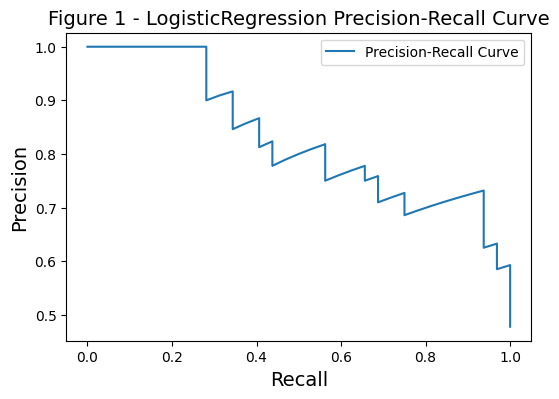

In [ ]:
# Mack code
y_proba = best_pipeline_logistic.predict_proba(X_test)[:, 1]

# 2. Compute precision and recall at various thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_proba, pos_label=1)

# 3. Plot the precision-recall curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.xlabel("Recall", fontsize=14)
plt.ylabel("Precision", fontsize=14)
plt.title("Figure 1 - LogisticRegression Precision-Recall Curve", fontsize=14)
plt.savefig("logistic_precision_recall.png")
plt.legend()
plt.show()

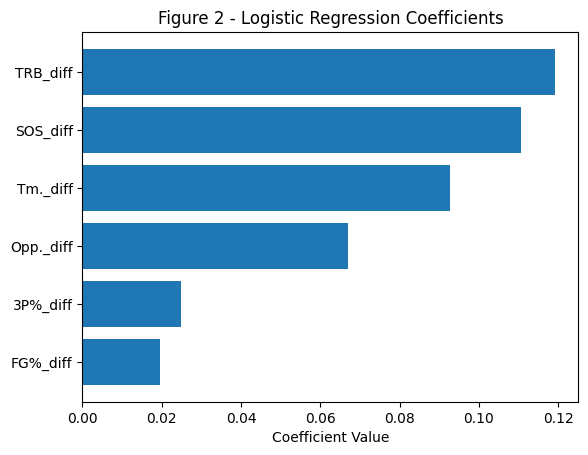

In [ ]:
# Mack code
import pandas as pd
import matplotlib.pyplot as plt

# 1. Get the trained LogisticRegression model from your pipeline
logistic_model = best_pipeline_logistic.named_steps["logisticregression"]

# 2. Extract the coefficients (coef_ is a 2D array, with shape [n_classes, n_features])
#    For a binary classification with one set of coefficients, use logistic_model.coef_[0]
coefs = logistic_model.coef_[0]

# 3. Create a DataFrame for easy sorting and plotting
feature_names = x_train.columns
feat_imp_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefs})

# 4. Sort by absolute coefficient value (largest magnitude is most influential)
feat_imp_df["abs_coeff"] = feat_imp_df["Coefficient"].abs()
feat_imp_df.sort_values("abs_coeff", ascending=False, inplace=True)

# 5. Plot
plt.barh(feat_imp_df["Feature"], feat_imp_df["Coefficient"])
plt.xlabel("Coefficient Value")
plt.title("Figure 2 - Logistic Regression Coefficients")
plt.gca().invert_yaxis()  # Top features on top
plt.savefig("logistic_coefficients.png")
plt.show()

In [ ]:
# Mack code
# model 1 -- logisticregression (input features --> Hyperparameters)

# DO NOT RUN THIS CELL

from itertools import combinations
from tqdm.auto import tqdm

start_pipeline = make_pipeline(StandardScaler(), LogisticRegression())

best_score = 0
best_features = []
for i in tqdm(range(1,len(features) + 1)):
  for combo in tqdm(combinations(features, i)):
    features_combo = list(combo)
    score = cross_val_score(start_pipeline,
                    X=df_combined_22_23[features_combo], y=df_combined_22_23["winner"],
                    scoring="f1_macro", cv=10).mean()
    if score > best_score:
      best_score = score
      best_features = features_combo
print(f"{best_features}: {best_score}")

  0%|          | 0/14 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

['SRS_diff', 'Opp._diff', 'PF_diff']: 0.8063492063492064


0.8063492063492064

In [ ]:
# Mack code
# DO NOT RUN THIS CELL

X_train = df_combined_22_23[best_features]
Y_train = df_combined_22_23["winner"]

models = {}

for scaler in tqdm(scalers):
  pipeline = make_pipeline(scaler, LogisticRegression())

  grid_cv = GridSearchCV(pipeline,
                         param_grid={},
                         scoring="f1_macro", cv=10)
  grid_cv.fit(X_train, Y_train)

  potential_model = [f"Scaler: {scaler}"]
  for key, value in (grid_cv.best_params_).items():
    potential_model.append(f"{key}: {value}")
  potential_model = tuple(potential_model)
  models[potential_model] = grid_cv.best_score_

  0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
# Mack code
# DO NOT RUN THIS CELL

best_hypes = ()
best_score = 0
for key in models.keys():
  if models[key] > best_score:
    best_score = models[key]
    best_hypes = key

best_hypes
print(f"{best_hypes}: {best_score}")

('Scaler: RobustScaler()',): 0.8063492063492064


In [ ]:
# Mack code
# RUN THIS ONE!!

logistic_HypInputs_Scaler = RobustScaler()
logistic_HypInputs_c = 0.01
logistic_HypInputs_penalty = "l2"
logistic_HypInputs_solver = "lbfgs"


logistic_HypInputs_features = ['SRS_diff', 'Opp._diff', 'PF_diff']
logistic_HypInputs_Pipeline = make_pipeline(logistic_HypInputs_Scaler,
                                                   LogisticRegression(C=logistic_HypInputs_c, penalty=logistic_HypInputs_penalty, solver=logistic_HypInputs_solver))

In [ ]:
# Mack code
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Features, pipeline, and hyperparams as given
logistic_HypInputs_Scaler = RobustScaler()
logistic_HypInputs_c = 0.01
logistic_HypInputs_penalty = "l2"
logistic_HypInputs_solver = "lbfgs"

logistic_HypInputs_features = ['SRS_diff', 'Opp._diff', 'PF_diff']

logistic_HypInputs_Pipeline = make_pipeline(
    logistic_HypInputs_Scaler,
    LogisticRegression(
        C=logistic_HypInputs_c,
        penalty=logistic_HypInputs_penalty,
        solver=logistic_HypInputs_solver,
        random_state=42
    )
)

# 1. Separate training (22–23) and testing (23–24) sets
X_train = df_combined_22_23[logistic_HypInputs_features]
y_train = df_combined_22_23["winner"]

X_test = df_combined_23_24[logistic_HypInputs_features]
y_test = df_combined_23_24["winner"]

# 2. Fit the pipeline on 22–23 data
logistic_HypInputs_Pipeline.fit(X_train, y_train)

# 3. Predict on 23–24 data
y_pred = logistic_HypInputs_Pipeline.predict(X_test)

# 4. Evaluate
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="macro")
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy on 2023–24 data: {accuracy:.3f}")
print(f"F1-macro on 2023–24 data: {f1:.3f}")
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy on 2023–24 data: 0.701
F1-macro on 2023–24 data: 0.675
Confusion Matrix:
 [[33  2]
 [18 14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.94      0.77        35
           1       0.88      0.44      0.58        32

    accuracy                           0.70        67
   macro avg       0.76      0.69      0.68        67
weighted avg       0.76      0.70      0.68        67



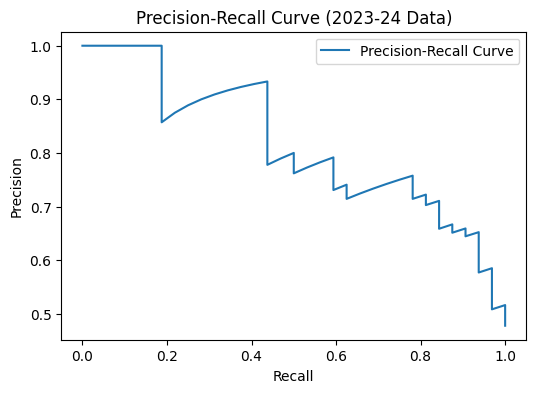

In [ ]:
# Mack code
y_proba = logistic_HypInputs_Pipeline.predict_proba(X_test)[:, 1]

# 2. Compute precision and recall at various thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_proba, pos_label=1)

# 3. Plot the precision-recall curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (2023-24 Data)")
plt.legend()
plt.show()

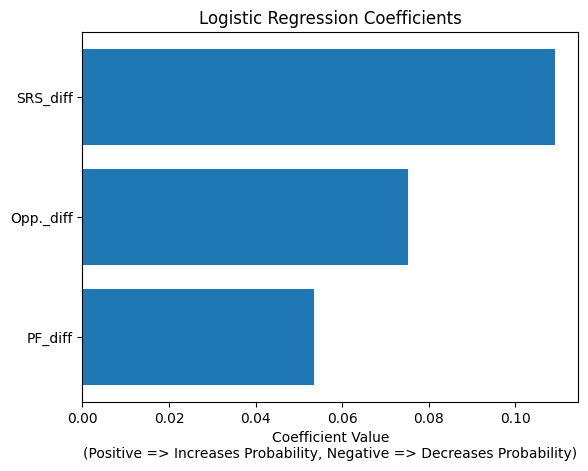

In [ ]:
# Mack code
import pandas as pd
import matplotlib.pyplot as plt

# 1. Get the trained LogisticRegression model from your pipeline
logistic_model = logistic_HypInputs_Pipeline.named_steps["logisticregression"]

# Ensure the pipeline is fit before accessing coefficients:
logistic_HypInputs_Pipeline.fit(df_combined_22_23[logistic_HypInputs_features], df_combined_22_23["winner"]) # This line was added

# 2. Extract the coefficients (coef_ is a 2D array, with shape [n_classes, n_features])
#    For a binary classification with one set of coefficients, use logistic_model.coef_[0]
coefs = logistic_model.coef_[0]

# 3. Create a DataFrame for easy sorting and plotting
feat_imp_df = pd.DataFrame({"Feature": logistic_HypInputs_features, "Coefficient": coefs})

# 4. Sort by absolute coefficient value (largest magnitude is most influential)
feat_imp_df["abs_coeff"] = feat_imp_df["Coefficient"].abs()
feat_imp_df.sort_values("abs_coeff", ascending=False, inplace=True)

# 5. Plot
plt.barh(feat_imp_df["Feature"], feat_imp_df["Coefficient"])
plt.xlabel("Coefficient Value\n(Positive => Increases Probability, Negative => Decreases Probability)")
plt.title("Logistic Regression Coefficients")
plt.gca().invert_yaxis()  # Top features on top
plt.show()

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import cross_val_score
import numpy as np


In [ ]:
# Mack code
# ensemble of logisticregression

# ensemble model of randomforestclassifier

# Create two pipelines with different scalers
pipeline1 = make_pipeline(RobustScaler(), LogisticRegression(C=0.01, solver="lbfgs", penalty="l2"))

pipeline2 = make_pipeline(logistic_HypInputs_Scaler,
                                                   LogisticRegression(C=logistic_HypInputs_c, penalty=logistic_HypInputs_penalty, solver=logistic_HypInputs_solver))

# Create a VotingClassifier that combines the pipelines (using soft voting)
ensemble_model = VotingClassifier(
    estimators=[('standard_rf', pipeline1), ('minmax_rf', pipeline2)],
    voting='soft'
)

# Evaluate using cross-validation
scores = cross_val_score(ensemble_model, x_train, y_train, cv=10, scoring="f1_macro", n_jobs=-1)
print("Cross-validated F1-macro scores:", scores)
print("Mean F1-macro score:", np.mean(scores))


Cross-validated F1-macro scores: [0.84444444 0.84444444 0.85714286 0.70833333 0.85714286 0.85714286
 0.70833333 0.625      0.33333333 0.82857143]
Mean F1-macro score: 0.7463888888888888


.7463888

In [ ]:
# Mack code
# model 2 -- randomforest --> hyperparameters then input features

# DONT NEED TO RUN CELL --> CORRECT OUTPUT BELOW

features = ["Seed_diff", "W-L%_diff", "SRS_diff", "SOS_diff", "Tm._diff", "Opp._diff", "FG%_diff",
            "3P%_diff", "TRB_diff", "AST_diff", "STL_diff", "BLK_diff", "TOV_diff", "PF_diff"]

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

X_train = df_combined_22_23[features]
Y_train = df_combined_22_23["winner"]

models = {}

for scaler in scalers:
    pipeline = make_pipeline(scaler, RandomForestClassifier(random_state=42))

    grid_cv = GridSearchCV(
        pipeline,
        param_grid={
            "randomforestclassifier__n_estimators": [50, 100, 200],
            "randomforestclassifier__max_depth": [None, 5, 10, 20],
            "randomforestclassifier__min_samples_split": [2, 5, 10]
        },
        scoring="f1_macro",
        cv=10
    )

    grid_cv.fit(X_train, Y_train)

    potential_model = [f"Scaler: {scaler}"]
    for key, value in grid_cv.best_params_.items():
        potential_model.append(f"{key}: {value}")
    potential_model = tuple(potential_model)
    models[potential_model] = grid_cv.best_score_
    print(scaler)

models

KeyboardInterrupt: 

In [ ]:
# Mack code
# Finding the best hyperparameters

# DO NOT NEED TO RUN CELL

best_hypes = ()
score = 0
for key in models.keys():
  if models[key] > score:
    score = models[key]
    best_hypes = key

best_hypes

()

In [ ]:
# Mack code
# DO NOT NEED TO RUN CELL

best_scaler = MaxAbsScaler()
best_depth = 5
best_split = 2
best_estimators = 100

# Choosing best input features

from itertools import combinations

best_pipeline = make_pipeline(best_scaler, RandomForestClassifier(max_depth=best_depth, min_samples_split=best_split, n_estimators=best_estimators))

best_score = 0
best_features = []
for i in range(1,len(features) + 1):
  for combo in combinations(features, i):
    features_combo = list(combo)
    score = cross_val_score(best_pipeline,
                    X=df_combined_22_23[features_combo], y=df_combined_22_23["winner"],
                    scoring="f1_macro", cv=10).mean()
    if score > best_score:
      best_score = score
      best_features = features_combo

print(f"{best_features}: {best_score}")

KeyboardInterrupt: 

In [ ]:
# Mack code
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

best_features_forests = ['SRS_diff', 'SOS_diff', 'Tm._diff', 'Opp._diff']

best_pipeline_forests = make_pipeline(MaxAbsScaler(), RandomForestClassifier(max_depth=5, min_samples_split=2, n_estimators=100))

x_train = df_combined_22_23[best_features_forests]
y_train = df_combined_22_23["winner"]

x_test = df_combined_23_24[best_features_forests]
y_test = df_combined_23_24["winner"]

best_pipeline_forests.fit(x_train, y_train)

best_pipeline_forests.predict(x_test)

array([1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0])

In [ ]:
# Mack code
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Features and pipeline definition
best_features_forests = ['SRS_diff', 'SOS_diff', 'Tm._diff', 'Opp._diff']
best_pipeline_forests = make_pipeline(
    MaxAbsScaler(),
    RandomForestClassifier(max_depth=5, min_samples_split=2, n_estimators=100, random_state=42)
)

# Separate training (22–23) and testing (23–24) sets
X_train = df_combined_22_23[best_features_forests]
y_train = df_combined_22_23["winner"]

X_test = df_combined_23_24[best_features_forests]
y_test = df_combined_23_24["winner"]

# Fit the pipeline on 22–23 data
best_pipeline_forests.fit(X_train, y_train)

# Predict on 23–24 data
y_pred = best_pipeline_forests.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="macro")
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy on 2023–24 data: {accuracy:.3f}")
print(f"F1-macro on 2023–24 data: {f1:.3f}")
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy on 2023–24 data: 0.716
F1-macro on 2023–24 data: 0.703
Confusion Matrix:
 [[31  4]
 [15 17]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.89      0.77        35
           1       0.81      0.53      0.64        32

    accuracy                           0.72        67
   macro avg       0.74      0.71      0.70        67
weighted avg       0.74      0.72      0.71        67



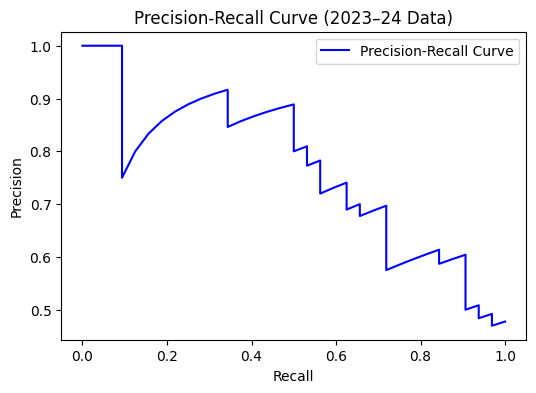

In [ ]:
# Mack code
y_proba = best_pipeline_forests.predict_proba(X_test)[:, 1]

# Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_proba, pos_label=1)

# Plot the precision-recall curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label="Precision-Recall Curve", color='b')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (2023–24 Data)")
plt.legend()
plt.show()

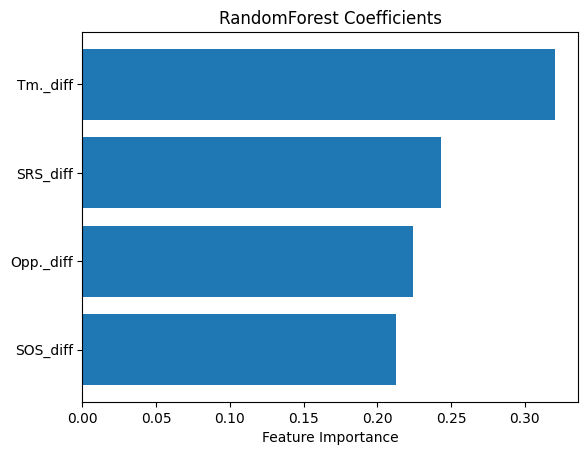

In [ ]:
# Mack code
import pandas as pd
import matplotlib.pyplot as plt

rf_model = best_pipeline_forests.named_steps["randomforestclassifier"]
importances = rf_model.feature_importances_

# Use the features from your best model (best_features_forests)
feature_names = best_features_forests  # Changed this line

feat_imp_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_imp_df.sort_values("Importance", ascending=False, inplace=True)

plt.barh(feat_imp_df["Feature"], feat_imp_df["Importance"])
plt.xlabel("Feature Importance")
plt.title("RandomForest Coefficients")
plt.gca().invert_yaxis()  # so top feature is at the top
plt.show()

In [ ]:
# Mack code
import itertools
import random
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from tqdm.auto import tqdm

# Ensure reproducibility:
random.seed(42)
np.random.seed(42)

best_score = 0
best_features = None

# Optional: count total possible subsets (excluding empty set)
total_subsets = sum(1 for i in range(1, len(features)+1) for _ in itertools.combinations(features, i))
print("Total subsets:", total_subsets)

count_tested = 0

# Iterate over all subset sizes
for i in range(1, len(features) + 1):
    # List all combinations of size i (wrap with list() to use tqdm)
    for combo in tqdm(list(itertools.combinations(features, i)), desc=f"Testing combinations of size {i}"):
        # Randomly decide to test this combination with a probability of 0.5
        if random.random() < 0.5:
            features_combo = list(combo)
            # Evaluate this combination using cross-validation
            cv_score = cross_val_score(
                make_pipeline(StandardScaler(), RandomForestClassifier(n_jobs=-1, random_state=42)),
                X=df_combined_22_23[features_combo],
                y=df_combined_22_23["winner"],
                scoring="f1_macro",
                cv=5,
                n_jobs=-1
            ).mean()
            count_tested += 1
            if cv_score > best_score:
                best_score = cv_score
                best_features = features_combo

print(f"Tested {count_tested} combinations out of {total_subsets} total subsets.")
print(f"Best combination: {best_features} with F1-macro score = {best_score:.3f}")


Total subsets: 16383


Testing combinations of size 1:   0%|          | 0/14 [00:00<?, ?it/s]

Testing combinations of size 2:   0%|          | 0/91 [00:00<?, ?it/s]

Testing combinations of size 3:   0%|          | 0/364 [00:00<?, ?it/s]

Testing combinations of size 4:   0%|          | 0/1001 [00:00<?, ?it/s]

Testing combinations of size 5:   0%|          | 0/2002 [00:00<?, ?it/s]

Testing combinations of size 6:   0%|          | 0/3003 [00:00<?, ?it/s]

Testing combinations of size 7:   0%|          | 0/3432 [00:00<?, ?it/s]

Testing combinations of size 8:   0%|          | 0/3003 [00:00<?, ?it/s]

Testing combinations of size 9:   0%|          | 0/2002 [00:00<?, ?it/s]

Testing combinations of size 10:   0%|          | 0/1001 [00:00<?, ?it/s]

Testing combinations of size 11:   0%|          | 0/364 [00:00<?, ?it/s]

Testing combinations of size 12:   0%|          | 0/91 [00:00<?, ?it/s]

Testing combinations of size 13:   0%|          | 0/14 [00:00<?, ?it/s]

Testing combinations of size 14:   0%|          | 0/1 [00:00<?, ?it/s]

Tested 8159 combinations out of 16383 total subsets.
Best combination: ['Seed_diff', 'SOS_diff', 'Opp._diff', 'TRB_diff', 'STL_diff', 'BLK_diff', 'PF_diff'] with F1-macro score = 0.804


Tested 8159 combinations out of 16383 total subsets.
Best combination: ['Seed_diff', 'SOS_diff', 'Opp._diff', 'TRB_diff', 'STL_diff', 'BLK_diff', 'PF_diff']
with F1-macro score = 0.804

In [ ]:
# Mack code
# DO NOT RUN THIS CELL

forests_2_best_features = ['Seed_diff', 'SOS_diff', 'Opp._diff', 'TRB_diff', 'STL_diff', 'BLK_diff', 'PF_diff']

X_train = df_combined_22_23[forests_2_best_features]
Y_train = df_combined_22_23["winner"]

models = {}

for scaler in tqdm(scalers):
  pipeline = make_pipeline(scaler, RandomForestClassifier())

  grid_cv = GridSearchCV(pipeline,
                         param_grid={
                        "randomforestclassifier__n_estimators": [50, 100, 200],
                        "randomforestclassifier__max_depth": [None, 5, 10, 20],
                        "randomforestclassifier__min_samples_split": [2, 5, 10]
                    },
                         scoring="f1_macro", cv=10)
  grid_cv.fit(X_train, Y_train)

  potential_model = [f"Scaler: {scaler}"]
  for key, value in (grid_cv.best_params_).items():
    potential_model.append(f"{key}: {value}")
  potential_model = tuple(potential_model)
  models[potential_model] = grid_cv.best_score_

  0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
# Mack code
# DO NOT RUN THIS CELL

best_hypes = ()
best_score = 0
for key in models.keys():
  if models[key] > best_score:
    best_score = models[key]
    best_hypes = key

best_hypes
print(f"{best_hypes}: {best_score}")

('Scaler: Normalizer()', 'randomforestclassifier__max_depth: 5', 'randomforestclassifier__min_samples_split: 5', 'randomforestclassifier__n_estimators: 100'): 0.794642857142857


In [ ]:
# Mack code
# RUN THIS ONE!!

forests_2_best_features = ['Seed_diff', 'SOS_diff', 'Opp._diff', 'TRB_diff', 'STL_diff', 'BLK_diff', 'PF_diff']

X_train = df_combined_22_23[forests_2_best_features]
Y_train = df_combined_22_23["winner"]

forests_HypInputs_Scaler = Normalizer()
forests_HypInputs_max_depth = 5
forests_HypInputs_min_samples_split = 5
forests_HypInputs_n_estimators = 100

forests_HypInputs_features = ['Seed_diff', 'SOS_diff', 'Opp._diff', 'TRB_diff', 'STL_diff', 'BLK_diff', 'PF_diff']
forests_HypInputs_Pipeline = make_pipeline(forests_HypInputs_Scaler,
                                                   RandomForestClassifier(max_depth=forests_HypInputs_max_depth, min_samples_split=forests_HypInputs_min_samples_split, n_estimators=forests_HypInputs_n_estimators))

In [ ]:
# Mack code
forests_HypInputs_Pipeline.fit(df_combined_22_23[forests_HypInputs_features], df_combined_22_23["winner"])

forests_HypInputs_Pipeline.predict(df_combined_23_24[forests_HypInputs_features])

array([1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0])

In [ ]:
# Mack code
# MACKS BEST MODEL --> RANDOMFORESTCLASSIFIER: INPUT FEATURES --> HYPERPARAMS

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Define features
forests_2_best_features = ['Seed_diff', 'SOS_diff', 'Opp._diff', 'TRB_diff', 'STL_diff', 'BLK_diff', 'PF_diff']

# Prepare training data (2022–23)
X_train = df_combined_22_23[forests_2_best_features]
Y_train = df_combined_22_23["winner"]

# Prepare test data (2023–24)
X_test = df_combined_23_24[forests_2_best_features]
Y_test = df_combined_23_24["winner"]

# Define hyperparameters and create pipeline
forests_HypInputs_Scaler = Normalizer()
forests_HypInputs_max_depth = 5
forests_HypInputs_min_samples_split = 5
forests_HypInputs_n_estimators = 100

forests_HypInputs_Pipeline = make_pipeline(
    forests_HypInputs_Scaler,
    RandomForestClassifier(
        max_depth=forests_HypInputs_max_depth,
        min_samples_split=forests_HypInputs_min_samples_split,
        n_estimators=forests_HypInputs_n_estimators,
        random_state=42
    )
)

# Fit the pipeline on the training data
forests_HypInputs_Pipeline.fit(X_train, Y_train)

# Predict on the test data
Y_pred = forests_HypInputs_Pipeline.predict(X_test)

# Evaluate predictions
accuracy = accuracy_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred, average="macro")
cm = confusion_matrix(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)

print(f"Accuracy on 2023–24 data: {accuracy:.3f}")
print(f"F1-macro on 2023–24 data: {f1:.3f}")
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", report)

Accuracy on 2023–24 data: 0.716
F1-macro on 2023–24 data: 0.710
Confusion Matrix:
 [[29  6]
 [13 19]]

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.83      0.75        35
           1       0.76      0.59      0.67        32

    accuracy                           0.72        67
   macro avg       0.73      0.71      0.71        67
weighted avg       0.72      0.72      0.71        67



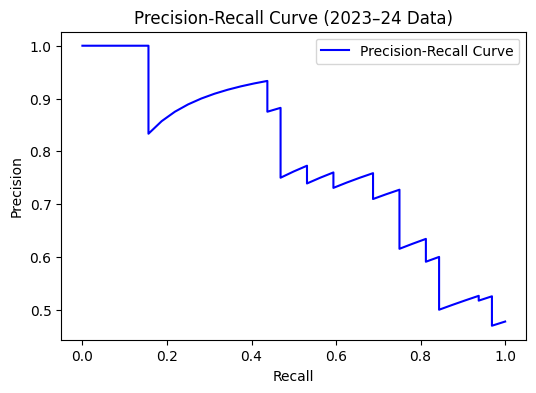

In [ ]:
# Mack code
Y_proba = forests_HypInputs_Pipeline.predict_proba(X_test)[:, 1]

# Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(Y_test, Y_proba, pos_label=1)

# Plot the precision-recall curve
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label="Precision-Recall Curve", color='b')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (2023–24 Data)")
plt.legend()
plt.show()

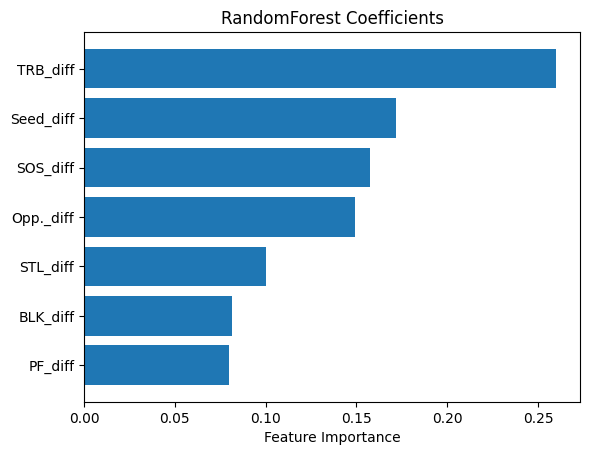

In [ ]:
# Mack code
import pandas as pd
import matplotlib.pyplot as plt

rf_model = forests_HypInputs_Pipeline.named_steps["randomforestclassifier"]  # if that's the name
importances = rf_model.feature_importances_

# Use the features from your best model (best_features_forests)
feature_names = forests_HypInputs_features  # Changed this line

feat_imp_df = pd.DataFrame({"Feature": forests_HypInputs_features, "Importance": importances})
feat_imp_df.sort_values("Importance", ascending=False, inplace=True)

plt.barh(feat_imp_df["Feature"], feat_imp_df["Importance"])
plt.xlabel("Feature Importance")
plt.title("RandomForest Coefficients")
plt.gca().invert_yaxis()  # so top feature is at the top
plt.show()

In [ ]:
# Mack code
# ensemble model of randomforestclassifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Create two pipelines with different scalers
pipeline1 = make_pipeline(MaxAbsScaler(), RandomForestClassifier(max_depth=5, min_samples_split=2, n_estimators=100))

pipeline2 = make_pipeline(forests_HypInputs_Scaler, RandomForestClassifier(max_depth=forests_HypInputs_max_depth, min_samples_split=forests_HypInputs_min_samples_split, n_estimators=forests_HypInputs_n_estimators))

# Create a VotingClassifier that combines the pipelines (using soft voting)
ensemble_model = VotingClassifier(
    estimators=[('standard_rf', pipeline1), ('minmax_rf', pipeline2)],
    voting='soft'
)

# Evaluate using cross-validation
scores = cross_val_score(ensemble_model, x_train, y_train, cv=10, scoring="f1_macro", n_jobs=-1)
print("Cross-validated F1-macro scores:", scores)
print("Mean F1-macro score:", np.mean(scores))

Cross-validated F1-macro scores: [0.85714286 1.         0.70833333 0.70833333 0.70833333 0.85714286
 0.84444444 0.82857143 0.48571429 0.66666667]
Mean F1-macro score: 0.7664682539682539


In [ ]:
# Kevin Code
# Base features variable:
features = ["Seed_diff", "W-L%_diff", "SRS_diff", "SOS_diff", "Tm._diff", "Opp._diff", "FG%_diff", "3P%_diff", "TRB_diff", "AST_diff", "STL_diff", "BLK_diff", "TOV_diff", "PF_diff"]


# Model libraries needed along with scalers and metrics
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import (MaxAbsScaler, MinMaxScaler, Normalizer, PowerTransformer, QuantileTransformer, RobustScaler, StandardScaler)
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from itertools import combinations
import numpy as np
from tqdm.auto import tqdm

# List of scalers and distance metrics
scalers = [MaxAbsScaler(), MinMaxScaler(), Normalizer(), PowerTransformer(), QuantileTransformer(n_quantiles=60, output_distribution='normal'), RobustScaler(), StandardScaler()]
dist_metrics = ["euclidean", "manhattan", "chebyshev", "minkowski"]

In [ ]:
# Kevin Code

# model 3 -- kneighborsclassifier (Tuning Hyperparameters/Scaler, then input features)

# Training data starting with all features first
X_train = df_combined_22_23[features]
Y_train = df_combined_22_23["winner"]

# Variables to store the best hyperparameters/scaler and the f1_macro score of the model with the hyperparameters/scaler
best_score = 0
best_hypes = []

# Going through every combination of scalers and hyperparameters
for scaler in scalers:
  pipeline = make_pipeline(scaler, KNeighborsClassifier())
  grid_cv = GridSearchCV(pipeline,
                         param_grid={"kneighborsclassifier__n_neighbors": range(1, 30),"kneighborsclassifier__metric": dist_metrics},
                         scoring="f1_macro", cv=10)
  grid_cv.fit(X_train, Y_train)

  potential_model = [f"Scaler: {scaler}"]
  for key, value in (grid_cv.best_params_).items():
    potential_model.append(f"{key}: {value}")
  score = grid_cv.best_score_

  if score > best_score:
    best_score = score
    best_hypes = potential_model

print(f"{best_hypes}: {best_score}")

['Scaler: MinMaxScaler()', 'kneighborsclassifier__metric: chebyshev', 'kneighborsclassifier__n_neighbors: 5']: 0.7836507936507936


In [ ]:
# Kevin Code

# Storing the best hyperparamets/scaler for the model when tuning hyperparameters first
best_scaler = MinMaxScaler()
best_metric = "chebyshev"
best_neighbors = 5

# Tuning the input features

# The pipeline with the best scaler and model with the best hyperparameters
best_pipeline = make_pipeline(best_scaler, KNeighborsClassifier(n_neighbors=best_neighbors, metric=best_metric))

# Variables to store the best input features to use for the model and the f1_score it produces
best_score = 0
best_features = []

# Going through every combination of input features
for i in tqdm(range(1,len(features) + 1)):
  for combo in tqdm(combinations(features, i)):
    features_combo = list(combo)
    score = cross_val_score(best_pipeline,
                    X=df_combined_22_23[features_combo], y=df_combined_22_23["winner"],
                    scoring="f1_macro", cv=10).mean()
    if score > best_score:
      best_score = score
      best_features = features_combo

print(f"{best_features}: {best_score}")

  0%|          | 0/14 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

['SRS_diff', 'SOS_diff', 'Tm._diff', 'Opp._diff', 'TRB_diff', 'AST_diff', 'BLK_diff', 'TOV_diff', 'PF_diff']: 0.8283730158730158


In [ ]:
# Kevin Code

# Storing the best hyperparameters/scaler and best features for the KNeighborsClassifier model after tuning hyperparameters/scaler first and then input features
kneighborsModel_HypInputs_Scaler = MinMaxScaler()
kneighborsModel_HypInputs_metric = "chebyshev"
kneighborsModel_HypInputs_neighbors = 5
kneighborsModel_HypInputs_features = ['SRS_diff', 'SOS_diff', 'Tm._diff', 'Opp._diff', 'TRB_diff', 'AST_diff', 'BLK_diff', 'TOV_diff', 'PF_diff']
kneighborsModel_HypInputs_Pipeline = make_pipeline(kneighborsModel_HypInputs_Scaler,
                                                   KNeighborsClassifier(n_neighbors=kneighborsModel_HypInputs_neighbors, metric=kneighborsModel_HypInputs_metric))

# Storing the f1_macro score for this model
kneighborsModel_HypInputs_XTrain = df_combined_22_23[kneighborsModel_HypInputs_features]
kneighborsModel_HypInputs_YTrain = df_combined_22_23["winner"]

kneighborsModel_HypInputs_Score = cross_val_score(kneighborsModel_HypInputs_Pipeline, kneighborsModel_HypInputs_XTrain, kneighborsModel_HypInputs_YTrain, scoring= "f1_macro", cv= 10).mean()
kneighborsModel_HypInputs_Score

np.float64(0.8283730158730158)

In [ ]:
# Kevin Code

# model 3 -- kneighborsclassifier (Tuning input features, then Hyperparameters/Scaler)

# Making a general starting pipeline to find the best input features for the model first
start_pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=10))

# Variables to store the best input features for the general model and the f1_macro score they produce
best_score = 0
best_features = []

# Going through every combination of input features
for i in tqdm(range(1,len(features) + 1)):
  for combo in tqdm(combinations(features, i)):
    features_combo = list(combo)
    score = cross_val_score(start_pipeline,
                    X=df_combined_22_23[features_combo], y=df_combined_22_23["winner"],
                    scoring="f1_macro", cv=10).mean()
    if score > best_score:
      best_score = score
      best_features = features_combo
print(f"{best_features}: {best_score}")

  0%|          | 0/14 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

['Seed_diff', 'W-L%_diff', 'SRS_diff', 'Tm._diff', 'Opp._diff', 'STL_diff', 'BLK_diff']: 0.8086111111111112


In [ ]:
# Kevin Code

# Varaibles to store the training data according the the best input features found above
X_train = df_combined_22_23[best_features]
Y_train = df_combined_22_23["winner"]

# Variables to store the best hyperparameters/scaler for the model with the best features and the f1_macro score it outputs
best_score = 0
best_hypes = []

# Going through every combination of scalers and hyperparameters
for scaler in tqdm(scalers):
  pipeline = make_pipeline(scaler, KNeighborsClassifier())

  grid_cv = GridSearchCV(pipeline,
                         param_grid={"kneighborsclassifier__n_neighbors": range(1, 30),"kneighborsclassifier__metric": dist_metrics},
                         scoring="f1_macro", cv=10)
  grid_cv.fit(X_train, Y_train)

  potential_model = [f"Scaler: {scaler}"]
  for key, value in (grid_cv.best_params_).items():
    potential_model.append(f"{key}: {value}")
  score = grid_cv.best_score_

  if score > best_score:
    best_score = score
    best_hypes = potential_model

print(f"{best_hypes}: {best_score}")

  0%|          | 0/7 [00:00<?, ?it/s]

["Scaler: QuantileTransformer(n_quantiles=60, output_distribution='normal')", 'kneighborsclassifier__metric: chebyshev', 'kneighborsclassifier__n_neighbors: 11']: 0.8286507936507936


In [ ]:
# Kevin Code

# Storing the best hyperparameters/scaler and best features for the KNeighborsClassifier model after tuning input features first and then hyperparameters/scaler
kneighborsModel_InputsHyp_Scaler = QuantileTransformer(n_quantiles=60, output_distribution='normal')
kneighborsModel_InputsHyp_metric = "chebyshev"
kneighborsModel_InputsHyp_neighbors = 11
kneighborsModel_InputsHyp_features = ['Seed_diff', 'W-L%_diff', 'SRS_diff', 'Tm._diff', 'Opp._diff', 'STL_diff', 'BLK_diff']
kneighborsModel_InputsHyp_Pipeline = make_pipeline(kneighborsModel_InputsHyp_Scaler,
                                                   KNeighborsClassifier(n_neighbors=kneighborsModel_InputsHyp_neighbors, metric=kneighborsModel_InputsHyp_metric))

kneighborsModel_InputsHyp_XTrain = df_combined_22_23[kneighborsModel_InputsHyp_features]
kneighborsModel_InputsHyp_YTrain = df_combined_22_23["winner"]

kneighborsModel_InputsHyp_Score = cross_val_score(kneighborsModel_InputsHyp_Pipeline, kneighborsModel_InputsHyp_XTrain, kneighborsModel_InputsHyp_YTrain, scoring= "f1_macro", cv= 10).mean()
kneighborsModel_InputsHyp_Score

np.float64(0.8286507936507936)

In [ ]:
# Kevin Code

# Ensembling the two KNeighborsClassifier models using VotingRegressor to see if a better model is produced

# Joining the input features of both models together to use with VotingRegressor
ensem_features = list(set(kneighborsModel_HypInputs_features + kneighborsModel_InputsHyp_features))

# Getting the training data accoriding to the joined inputs
X_train = df_combined_22_23[ensem_features]
Y_train = df_combined_22_23["winner"]

# Creating the ensemble model and outputing its f1_marco score
kneighborsModel_Ensemble = VotingClassifier([("kneighborsModel_HypInputs", kneighborsModel_HypInputs_Pipeline), ("kneighborsModel_InputsHyp", kneighborsModel_InputsHyp_Pipeline)])

kneighborsModel_Ensemble_Score = cross_val_score(kneighborsModel_Ensemble, X_train, Y_train, scoring= "f1_macro", cv= 10).mean()
kneighborsModel_Ensemble_Score

0.7898412698412698

In [ ]:
# Kevin Code

# Evaluating the scores for all the KNeighborsClassifier models to see which was the best one
print(f"kneighborsModel_HypInputs_Score : {kneighborsModel_HypInputs_Score}")
print(f"kneighborsModel_InputsHyp_Score : {kneighborsModel_InputsHyp_Score}")
print(f"kneighborsModel_Ensemble_Score : {kneighborsModel_Ensemble_Score}")

kneighborsModel_HypInputs_Score : 0.8283730158730158
kneighborsModel_InputsHyp_Score : 0.8286507936507936
kneighborsModel_Ensemble_Score : 0.7898412698412698


In [ ]:
# Kevin Code

# model 4 -- GaussianNB (Naive Bayes) (Tuning Hyperparameters/Scaler, then input features)
# Doing everything I did above for model 3 but for model 4 which is the GaussianNB model

X_train = df_combined_22_23[features]
Y_train = df_combined_22_23["winner"]

best_hypes = []
best_score = 0

for scaler in tqdm(scalers):
  pipeline = make_pipeline(scaler, GaussianNB())

  grid_cv = GridSearchCV(pipeline,
                         param_grid={"gaussiannb__var_smoothing": np.logspace(-12, 0, 1000)},
                         scoring="f1_macro", cv=10)
  grid_cv.fit(X_train, Y_train)

  potential_model = [f"Scaler: {scaler}"]
  for key, value in (grid_cv.best_params_).items():
    potential_model.append(f"{key}: {value}")
  score = grid_cv.best_score_

  if score > best_score:
    best_score = score
    best_hypes = potential_model

print(f"{best_hypes}: {best_score}")

  0%|          | 0/7 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
# Kevin Code

best_scaler = QuantileTransformer(n_quantiles=60, output_distribution='normal')
best_varSmoothing = 1e-12

best_pipeline = make_pipeline(best_scaler, GaussianNB(var_smoothing= best_varSmoothing))

best_score = 0
best_features = []
for i in tqdm(range(1,len(features) + 1)):
  for combo in tqdm(combinations(features, i)):
    features_combo = list(combo)
    score = cross_val_score(best_pipeline,
                    X=df_combined_22_23[features_combo], y=df_combined_22_23["winner"],
                    scoring="f1_macro", cv=10).mean()
    if score > best_score:
      best_score = score
      best_features = features_combo

print(f"{best_features}: {best_score}")

  0%|          | 0/14 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

['SOS_diff', 'Tm._diff', 'Opp._diff', '3P%_diff', 'TRB_diff', 'STL_diff', 'BLK_diff']: 0.8765079365079366


In [ ]:
# Kevin Code

gaussianModel_HypInputs_Scaler = QuantileTransformer(n_quantiles=60, output_distribution='normal')
gaussianModel_HypInputs_smoothing = 1e-12
gaussianModel_HypInputs_features = ['SOS_diff', 'Tm._diff', 'Opp._diff', '3P%_diff', 'TRB_diff', 'STL_diff', 'BLK_diff']
gaussianModel_HypInputs_Pipeline = make_pipeline(gaussianModel_HypInputs_Scaler,
                                                  GaussianNB(var_smoothing=gaussianModel_HypInputs_smoothing))

gaussianModel_HypInputs_XTrain = df_combined_22_23[gaussianModel_HypInputs_features]
gaussianModel_HypInputs_YTrain = df_combined_22_23["winner"]

gaussianModel_HypInputs_Score = cross_val_score(gaussianModel_HypInputs_Pipeline, gaussianModel_HypInputs_XTrain, gaussianModel_HypInputs_YTrain, scoring= "f1_macro", cv= 10).mean()
gaussianModel_HypInputs_Score

np.float64(0.8765079365079366)

In [ ]:
# Kevin Code

# model 4 -- GaussianNB (NavieBayes) (Tuning input features, then Hyperparameters/Scaler)

start_pipeline = make_pipeline(StandardScaler(), GaussianNB())

best_score = 0
best_features = []
for i in tqdm(range(1,len(features) + 1)):
  for combo in tqdm(combinations(features, i)):
    features_combo = list(combo)
    score = cross_val_score(start_pipeline,
                    X=df_combined_22_23[features_combo], y=df_combined_22_23["winner"],
                    scoring="f1_macro", cv=10).mean()
    if score > best_score:
      best_score = score
      best_features = features_combo
print(f"{best_features}: {best_score}")


  0%|          | 0/14 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

['SRS_diff', 'Tm._diff', 'PF_diff']: 0.8248015873015874


In [ ]:
# Kevin Code

X_train = df_combined_22_23[best_features]
Y_train = df_combined_22_23["winner"]

best_hypes = []
best_score = 0

for scaler in tqdm(scalers):
  pipeline = make_pipeline(scaler, GaussianNB())

  grid_cv = GridSearchCV(pipeline,
                         param_grid={"gaussiannb__var_smoothing": np.logspace(-12, 0, 1000)},
                         scoring="f1_macro", cv=10)
  grid_cv.fit(X_train, Y_train)

  potential_model = [f"Scaler: {scaler}"]
  for key, value in (grid_cv.best_params_).items():
    potential_model.append(f"{key}: {value}")
  score = grid_cv.best_score_

  if score > best_score:
    best_score = score
    best_hypes = potential_model

print(f"{best_hypes}: {best_score}")

  0%|          | 0/7 [00:00<?, ?it/s]

['Scaler: MaxAbsScaler()', 'gaussiannb__var_smoothing: 1e-12']: 0.8248015873015874


In [ ]:
# Kevin Code

gaussianModel_InputsHyp_Scaler = MaxAbsScaler()
gaussianModel_InputsHyp_smoothing = 1e-12
gaussianModel_InputsHyp_features = ['SRS_diff', 'Tm._diff', 'PF_diff']
gaussianModel_InputsHyp_Pipeline = make_pipeline(gaussianModel_InputsHyp_Scaler,
                                                  GaussianNB(var_smoothing=gaussianModel_InputsHyp_smoothing))

gaussianModel_InputsHyp_XTrain = df_combined_22_23[gaussianModel_InputsHyp_features]
gaussianModel_InputsHyp_YTrain = df_combined_22_23["winner"]

gaussianModel_InputsHyp_Score = cross_val_score(gaussianModel_InputsHyp_Pipeline, gaussianModel_InputsHyp_XTrain, gaussianModel_InputsHyp_YTrain, scoring= "f1_macro", cv= 10).mean()
gaussianModel_InputsHyp_Score

np.float64(0.8248015873015874)

In [ ]:
# Kevin Code

# Ensembling the two GaussianNB models using VotingRegressor to see if a better model is produced

ensem_features = list(set(gaussianModel_HypInputs_features + gaussianModel_InputsHyp_features))

X_train = df_combined_22_23[ensem_features]
Y_train = df_combined_22_23["winner"]

gaussianModel_Ensemble = VotingClassifier([("gaussianModel_HypInputs", gaussianModel_HypInputs_Pipeline), ("gaussianModel_InputsHyp", gaussianModel_InputsHyp_Pipeline)])

gaussianModel_Ensemble_Score = cross_val_score(gaussianModel_Ensemble, X_train, Y_train, scoring= "f1_macro", cv= 10).mean()
gaussianModel_Ensemble_Score

0.7320634920634921

In [ ]:
# Kevin Code

print(f"gaussianModel_HypInputs_Score : {gaussianModel_HypInputs_Score}")
print(f"gaussianModel_InputsHyp_Score : {gaussianModel_InputsHyp_Score}")
print(f"gaussianModel_Ensemble_score : {gaussianModel_Ensemble_Score}")

gaussianModel_HypInputs_Score : 0.8765079365079366
gaussianModel_InputsHyp_Score : 0.8248015873015874
gaussianModel_Ensemble_score : 0.7320634920634921


In [ ]:
# Kevin Code

# Getting the pipelines and features data for the best KNeighborsClassifier model and GaussianNB model according to the evalulations above

best_kneighborsModel_Pipeline = kneighborsModel_InputsHyp_Pipeline
best_gaussianModel_Pipeline = gaussianModel_HypInputs_Pipeline

best_kneighborsModel_XTrain = kneighborsModel_InputsHyp_XTrain
best_gaussianModel_XTrain = gaussianModel_HypInputs_XTrain

# Making a global variable for all the known outcomes of the training data
all_YTrain = df_combined_22_23["winner"]

# Storing the test data for the features of each model
best_kneighborsModel_XTest = df_combined_23_24[kneighborsModel_InputsHyp_features]
best_gaussianModel_XTest = df_combined_23_24[gaussianModel_HypInputs_features]

# Making a global variable for all the known outcomes of the test data
all_YTest = df_combined_23_24["winner"]

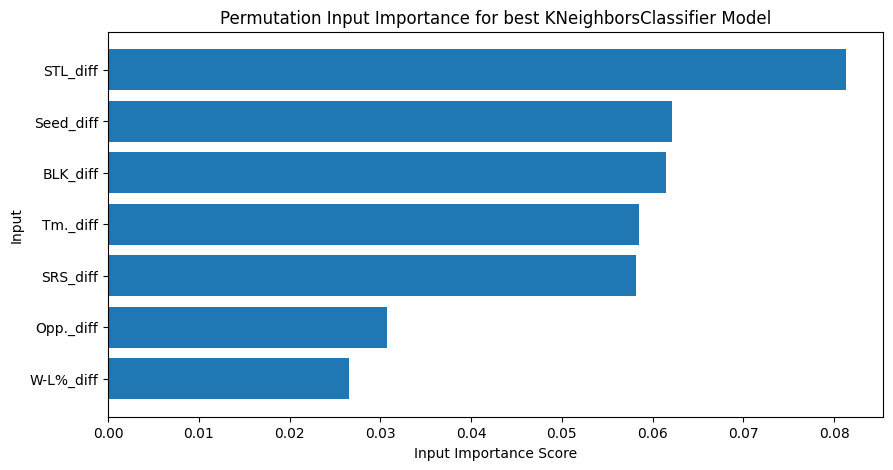

In [ ]:
# Kevin Code

# Graphing the importance of each input for the best KNeighborsClassifier model

# Using permutation_importance learned about online

from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Fitting the training data to the model
best_kneighborsModel_Pipeline.fit(best_kneighborsModel_XTrain, all_YTrain)

# Storing the information from permutation_importance function
perm_importance = permutation_importance(best_kneighborsModel_Pipeline, best_kneighborsModel_XTrain, all_YTrain, scoring= "f1_macro", n_repeats= 20, random_state= 0)

# Storing the importance means for each input which represents the accuracy drop when a feature is shuffled.
# So the higher the value, the more important a feature is to the model.
best_kneighborsModel_InputsImportance = perm_importance.importances_mean

# Plotting the input importance

# Sorting the input importance values in descending order so that when graph,
# longest bar is at the top
best_InputNames = best_kneighborsModel_XTrain.columns
sorted_iputs = np.argsort(best_kneighborsModel_InputsImportance)
sorted_importances = best_kneighborsModel_InputsImportance[sorted_iputs]
sorted_InputNames = best_InputNames[sorted_iputs]

# Plotting horizontal bar graph of inputs importance
plt.figure(figsize=(10, 5))
plt.barh(sorted_InputNames, sorted_importances)
plt.xlabel("Input Importance Score")
plt.ylabel("Input")
plt.title("Permutation Input Importance for best KNeighborsClassifier Model")
plt.gca()
plt.show()

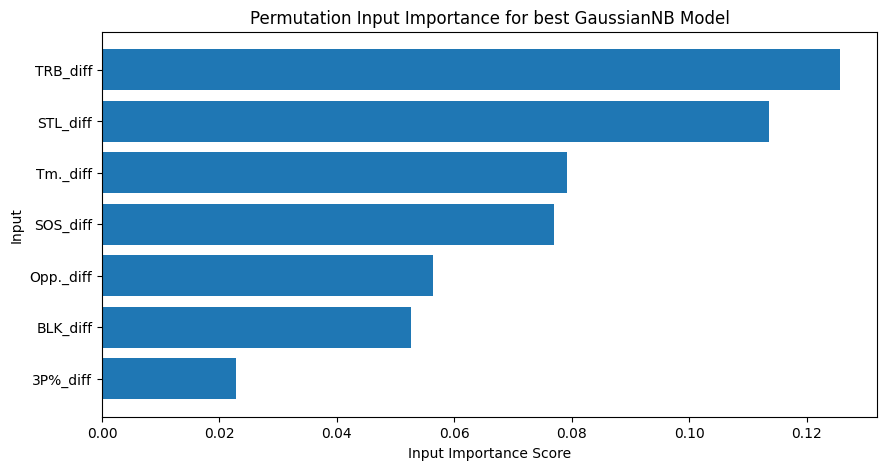

In [ ]:
# Kevin Code

# Graphing the importance of each input for the best GaussianNB model
# Just as done above with KNeighborsClassifier

best_gaussianModel_Pipeline.fit(best_gaussianModel_XTrain, all_YTrain)

perm_importance = permutation_importance(best_gaussianModel_Pipeline, best_gaussianModel_XTrain, all_YTrain, scoring= "f1_macro", n_repeats= 20, random_state= 0)

best_gaussianModel_InputsImportance = perm_importance.importances_mean


best_InputNames = best_gaussianModel_XTrain.columns
sorted_iputs = np.argsort(best_gaussianModel_InputsImportance)
sorted_importances = best_gaussianModel_InputsImportance[sorted_iputs]
sorted_InputNames = best_InputNames[sorted_iputs]

plt.figure(figsize=(10, 5))
plt.barh(sorted_InputNames, sorted_importances)
plt.xlabel("Input Importance Score")
plt.ylabel("Input")
plt.title("Permutation Input Importance for best GaussianNB Model")
plt.gca()
plt.show()

In [ ]:
# Kevin Code

# Getting the f1_macro score for the best KNeighborsClassifier model and GaussianNB model on the test data to see which is better

from sklearn.metrics import f1_score

best_kneighborsModel_Pipeline.fit(best_kneighborsModel_XTrain, all_YTrain)
best_kneighborsModel_YTest_predictions = best_kneighborsModel_Pipeline.predict(best_kneighborsModel_XTest)

best_kneighborsModel_YTest_f1macro = f1_score(all_YTest, best_kneighborsModel_YTest_predictions, average="macro")

best_gaussianModel_Pipeline.fit(best_gaussianModel_XTrain, all_YTrain)
best_gaussianModel_YTest_predictions = best_gaussianModel_Pipeline.predict(best_gaussianModel_XTest)

best_gaussianModel_YTest_f1macro = f1_score(all_YTest, best_gaussianModel_YTest_predictions, average="macro")

print(f"Best KNeighborsClassifier f1_score: {best_kneighborsModel_YTest_f1macro}")
print(f"Best GaussianNB f1_score: {best_gaussianModel_YTest_f1macro}")


Best KNeighborsClassifier f1_score: 0.7264065335753176
Best GaussianNB f1_score: 0.7298387096774194


In [ ]:
# Kevin Code

# Checking the estimated test error if using the 23-24 data as training data

best_kneighborsModel_YTest_f1macro = cross_val_score(best_kneighborsModel_Pipeline, best_kneighborsModel_XTest, all_YTest, scoring="f1_macro", cv=10).mean()
best_gaussianModel_YTest_f1macro = cross_val_score(best_gaussianModel_Pipeline, best_gaussianModel_XTest, all_YTest, scoring="f1_macro", cv=10).mean()

print(f"Best KNeighborsClassifier f1_score: {best_kneighborsModel_YTest_f1macro}")
print(f"Best GaussianNB f1_score: {best_gaussianModel_YTest_f1macro}")

Best KNeighborsClassifier f1_score: 0.7455952380952381
Best GaussianNB f1_score: 0.7657539682539681


<Axes: xlabel='precision'>

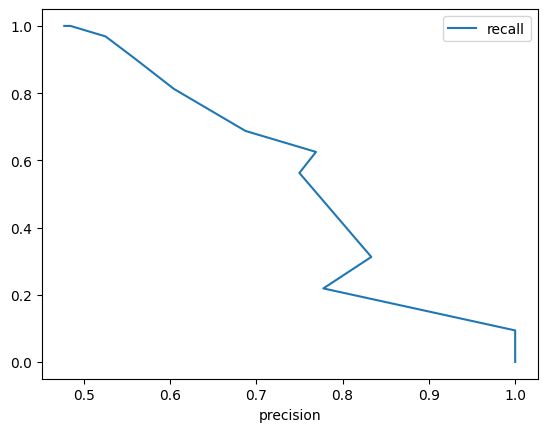

In [ ]:
# Kevin Code

# Graphing the precision-recall curve for the best KNeighborsClassifier model on the test data

from sklearn.metrics import precision_recall_curve

# Getting the probabilities produced by the model on the training data itself
best_kneighborsModel_Ytest_probs_ = best_kneighborsModel_Pipeline.predict_proba(best_kneighborsModel_XTest)

# Storing the precision and recall values for different thresholds using the precision_recall_curve function
# for the models accuracy on predicting the correct winner
kneighborsModel_precision, kneighborsModel_recall, kneighborsModel_thresholds = precision_recall_curve(
    all_YTest, best_kneighborsModel_Ytest_probs_[:, 1], pos_label=1)

# Plotting the precision-recall curve
pd.DataFrame({
    "precision": kneighborsModel_precision,
    "recall": kneighborsModel_recall
}).plot.line(x="precision", y="recall")

<Axes: xlabel='precision'>

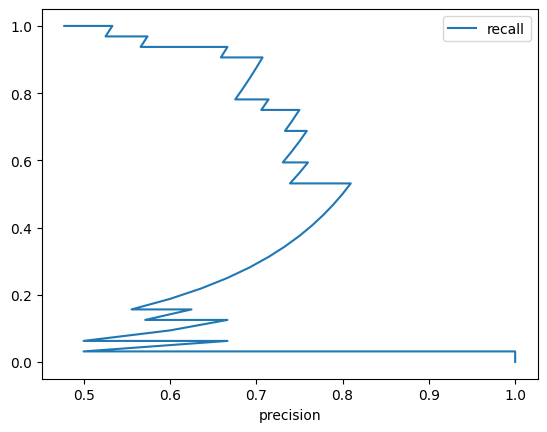

In [ ]:
# Kevin Code

# Graphing the precision-recall curve for the best GaussianNB model as done above for the KNeighborsClassifier model

best_gaussianModel_Ytest_probs_ = best_gaussianModel_Pipeline.predict_proba(best_gaussianModel_XTest)

gaussianModel_precision, gaussianModel_recall, gaussianModel_thresholds = precision_recall_curve(
    all_YTest, best_gaussianModel_Ytest_probs_[:, 1], pos_label=1)

pd.DataFrame({
    "precision": gaussianModel_precision,
    "recall": gaussianModel_recall
}).plot.line(x="precision", y="recall")

In [ ]:
# Mack Code (Modified by Kevin)
# Checking the estimated test error if using the 23-24 data as training data for Mack's models


best_features_logistic1 = ["SOS_diff", "Tm._diff", "Opp._diff", "FG%_diff", "3P%_diff", "TRB_diff"]

best_pipeline_logistic1 = make_pipeline(
    RobustScaler(),
    LogisticRegression(C=0.01, solver="lbfgs", penalty="l2", random_state=42)
)


best_features_logistic2 = ['SRS_diff', 'Opp._diff', 'PF_diff']

best_pipeline_logistic2 = make_pipeline(RobustScaler(), LogisticRegression(C=0.01, penalty="l2", solver="lbfgs"))

logistic1_f1macro = cross_val_score(best_pipeline_logistic1, df_combined_23_24[best_features_logistic1], all_YTest, scoring="f1_macro", cv=10).mean()
logistic2_f1macro = cross_val_score(best_pipeline_logistic2, df_combined_23_24[best_features_logistic2], all_YTest, scoring="f1_macro", cv=10).mean()

print(f"Logistic 1 f1_score: {logistic1_f1macro}")
print(f"Logistic 2 f1_score: {logistic2_f1macro}")

Logistic 1 f1_score: 0.6980555555555555
Logistic 2 f1_score: 0.5910714285714286


In [ ]:
# Kevin code
# Testing an ensemble of Mack's models

pipeline1 = best_pipeline_logistic1
pipeline2 = best_pipeline_logistic2

ensemble_model = VotingClassifier(
    estimators=[('best_pipeline_logistic1', pipeline1), ('best_pipeline_logistic2', pipeline2)],
    voting='soft'
)

logistic_ensemble =cross_val_score(ensemble_model, df_combined_23_24[list(set(best_features_logistic1 + best_features_logistic2))],
                all_YTest, scoring="f1_macro", cv=10).mean()
print(f"Forest Ensemble f1_score: {logistic_ensemble}")

Forest Ensemble f1_score: 0.6685714285714285


In [ ]:
# Mack Code (Modified by Kevin)
# Checking the estimated test error if using the 23-24 data as training data for Mack's models

best_features_forests1 = ['SRS_diff', 'SOS_diff', 'Tm._diff', 'Opp._diff']
best_pipeline_forests1 = make_pipeline(MaxAbsScaler(), RandomForestClassifier(max_depth=5, min_samples_split=2, n_estimators=100))

best_features_forests2 = ['Seed_diff', 'SOS_diff', 'Opp._diff', 'TRB_diff', 'STL_diff', 'BLK_diff', 'PF_diff']
best_pipeline_forests2 = make_pipeline(Normalizer(), RandomForestClassifier(max_depth=5, min_samples_split=5,
                                                                            n_estimators=100, random_state=42))

forest1_f1macro = cross_val_score(best_pipeline_forests1, df_combined_23_24[best_features_forests1], all_YTest, scoring="f1_macro", cv=10).mean()
forest2_f1macro = cross_val_score(best_pipeline_forests2, df_combined_23_24[best_features_forests2], all_YTest, scoring="f1_macro", cv=10).mean()

print(f"Forest 1 f1_score: {forest1_f1macro}")
print(f"Forest 2 f1_score: {forest2_f1macro}")

Forest 1 f1_score: 0.7339285714285714
Forest 2 f1_score: 0.7915873015873015


In [ ]:
# Kevin code
# Testing an ensemble of Mack's models

pipeline1 = best_pipeline_forests1
pipeline2 = best_pipeline_forests2

ensemble_model = VotingClassifier(
    estimators=[('best_pipeline_forests1', pipeline1), ('best_pipeline_forests2', pipeline2)],
    voting='soft'
)

forest_ensemble =cross_val_score(ensemble_model, df_combined_23_24[list(set(best_features_forests1 + best_features_forests2))],
                all_YTest, scoring="f1_macro", cv=10).mean()
print(f"Forest Ensemble f1_score: {forest_ensemble}")

Forest Ensemble f1_score: 0.8049206349206347
